Decision Tree

In [ ]:
# 1. Prepare decision tree classifier in python using sklearn library for data set diabetes.csv - (pregnant, glucose, bp, skin, insulin, bmi, pedigree, age, label). Use all features except label as independent variable. Use complete dataset for training and limit the depth of tree upto 3 levels and plot using tree.plotTree()method.

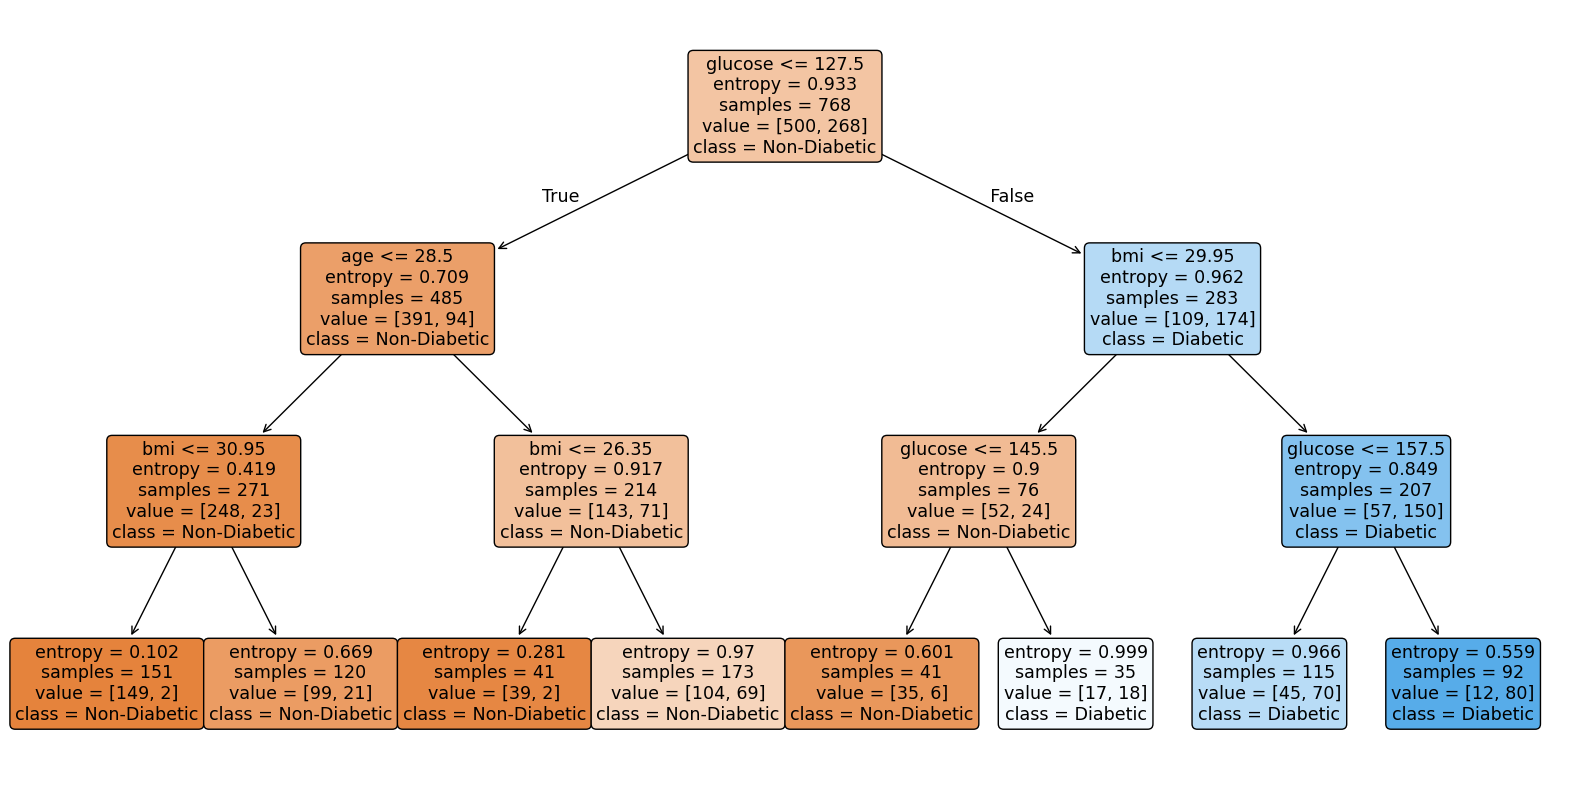

In [ ]:
# Import required libraries

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Load the dataset
# Note: We rename the columns to match the names specified in the instructions
data = pd.read_csv("diabetes.csv")
data.columns = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# Separate independent and dependent variables

X = data.drop("label", axis=1)
y = data["label"]

# Create and train the Decision Tree Classifier

clf = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=3,
    random_state=42
)

clf.fit(X, y)

# Plot the Decision Tree

plt.figure(figsize=(20, 10))
tree.plot_tree(
    clf,
    feature_names=X.columns,
    class_names=["Non-Diabetic", "Diabetic"],
    filled=True,
    rounded=True
)
plt.show()

In [ ]:
# 2. Using the diabetes dataset, implement a Decision Tree Classifier and determine the importance of each feature in predicting diabetes. Generate different plots to justify your model.

    Feature  Importance
1   glucose    0.492488
5       bmi    0.271401
7       age    0.141969
2        bp    0.043612
4   insulin    0.026136
0  pregnant    0.024394
3      skin    0.000000
6  pedigree    0.000000


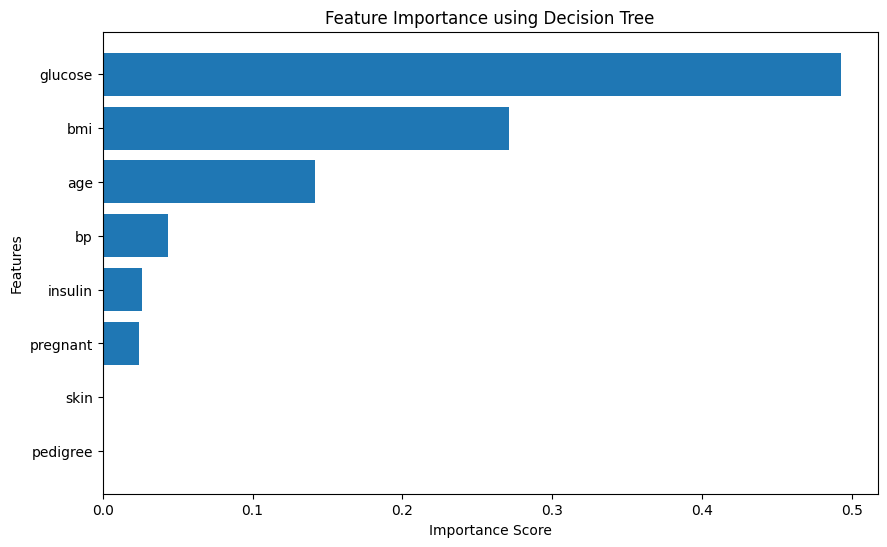

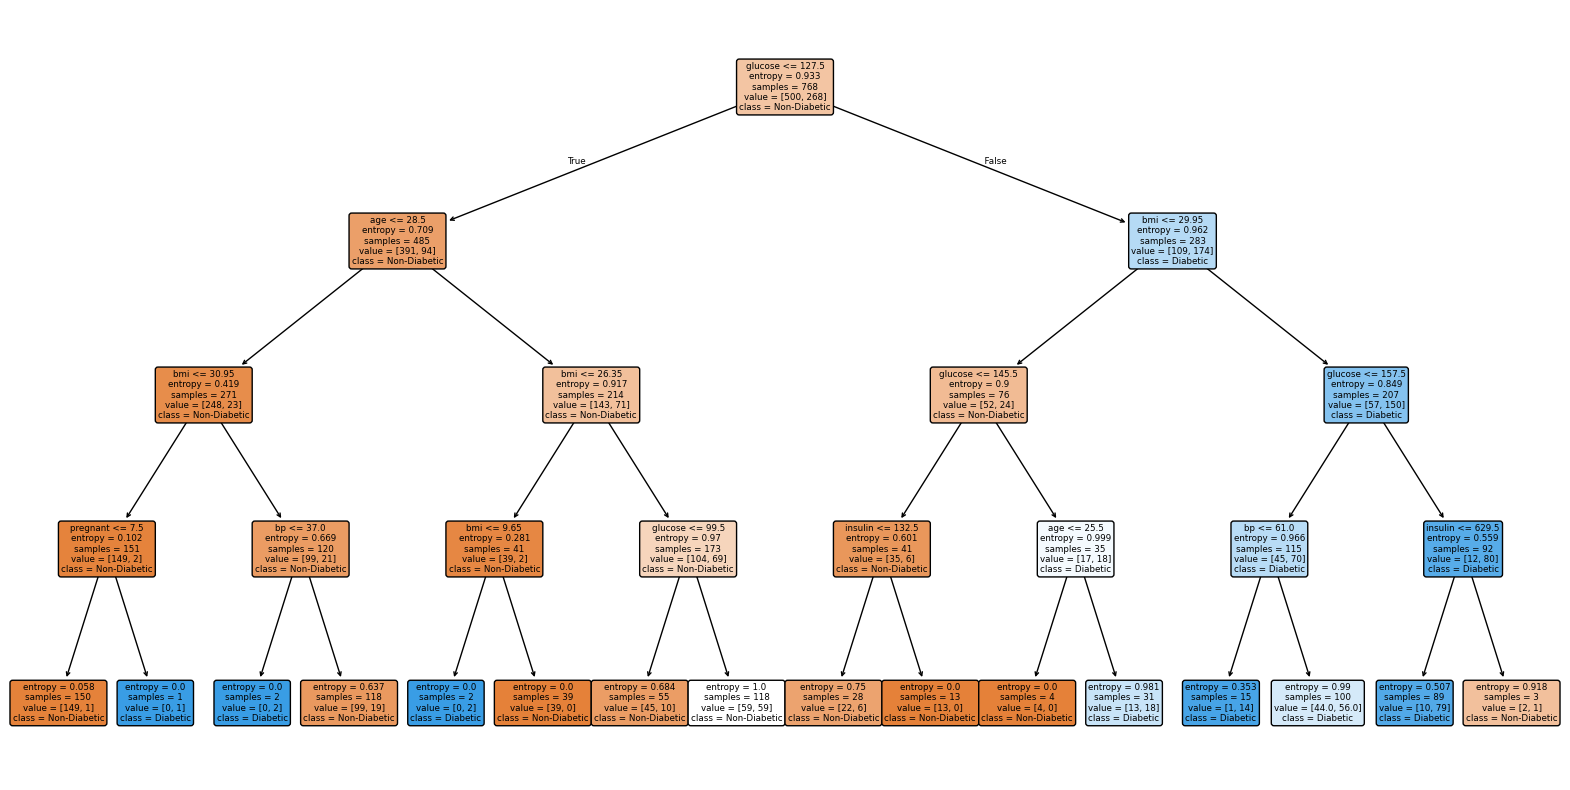

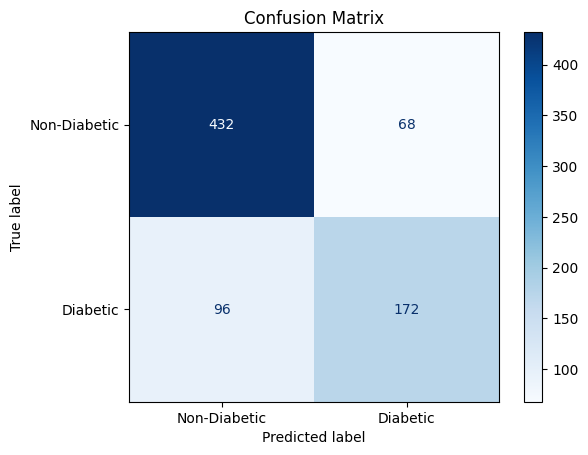

Model Accuracy: 0.7864583333333334


In [ ]:
# Import required libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load the diabetes dataset

data = pd.read_csv("diabetes.csv")

# Rename columns to match the expected names
data.columns = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# Split features and target

X = data.drop("label", axis=1)
y = data["label"]

# Train Decision Tree Classifier

model = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=4,
    random_state=42
)

model.fit(X, y)

# Feature Importance

importances = model.feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(feature_importance_df)

# Plot 1: Feature Importance Bar Chart

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"])
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance using Decision Tree")
# Invert y-axis to show the most important features at the top
plt.gca().invert_yaxis()
plt.show()

# Plot 2: Decision Tree Visualization

plt.figure(figsize=(20, 10))
tree.plot_tree(
    model,
    feature_names=X.columns,
    class_names=["Non-Diabetic", "Diabetic"],
    filled=True,
    rounded=True
)
plt.show()

# Plot 3: Confusion Matrix

y_pred = model.predict(X)

cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Diabetic", "Diabetic"])

disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Model Accuracy

accuracy = accuracy_score(y, y_pred)
print("Model Accuracy:", accuracy)

In [ ]:
# 3. Implement a Decision Tree Classifier and compare its performance with a SVM Classifier on the iris dataset. Display the accuracy of both models.

In [ ]:
# Import required libraries

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset

iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree Classifier

dt_model = DecisionTreeClassifier(
    criterion="entropy",
    random_state=42
)

dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_pred)

# Train Support Vector Machine (SVM) Classifier

svm_model = SVC(kernel="linear", random_state=42)

svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_pred)

# Display Accuracy of Both Model

print("Decision Tree Accuracy:", dt_accuracy)
print("SVM Accuracy:", svm_accuracy)

Decision Tree Accuracy: 0.9777777777777777
SVM Accuracy: 1.0


In [ ]:
# 4. Build decision tree classifier for iris data set. One with maximum leaf nodes up to 8 and another one with minimum sample per leaf as 5. Compare accuracy of both models.

In [ ]:
# Import required libraries

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset

iris = load_iris()
X = iris.data
y = iris.target

# Split dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Model 1: Decision Tree with max_leaf_nodes =

dt_max_leaf = DecisionTreeClassifier(
    max_leaf_nodes=8,
    random_state=42
)

dt_max_leaf.fit(X_train, y_train)
pred_leaf = dt_max_leaf.predict(X_test)

accuracy_leaf = accuracy_score(y_test, pred_leaf)

# Model 2: Decision Tree with min_samples_leaf = 5

dt_min_samples = DecisionTreeClassifier(
    min_samples_leaf=5,
    random_state=42
)

dt_min_samples.fit(X_train, y_train)
pred_samples = dt_min_samples.predict(X_test)

accuracy_samples = accuracy_score(y_test, pred_samples)

# Compare Accuracies

print("Accuracy with max_leaf_nodes = 8 :", accuracy_leaf)
print("Accuracy with min_samples_leaf = 5 :", accuracy_samples)

Accuracy with max_leaf_nodes = 8 : 1.0
Accuracy with min_samples_leaf = 5 : 1.0


In [ ]:
# 5. Implement a Decision Tree Classifier and compare its performance with a
# Logistic Classifier on the diabetes dataset. Develop Python code to display the accuracy of both models.

In [ ]:
# Import required libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the diabetes dataset

data = pd.read_csv("diabetes.csv")

# Rename columns to match the expected names used in the code
data.columns = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# Split features and target variable

X = data.drop("label", axis=1)
y = data["label"]

# Train–Test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Decision Tree Classifier

dt_model = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=5,
    random_state=42
)

dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_pred)

# Logistic Regression Classifier

log_model = LogisticRegression(max_iter=1000)

log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

log_accuracy = accuracy_score(y_test, log_pred)

# Display accuracy of both models

print("Decision Tree Accuracy:", dt_accuracy)
print("Logistic Regression Accuracy:", log_accuracy)

Decision Tree Accuracy: 0.7748917748917749
Logistic Regression Accuracy: 0.7359307359307359


In [ ]:
# 6. Develop a random dataset using 3 columns and 350 rows. Generate the data frame and apply decision tree classifier to train the model. Compare the accuracy of the model with any 2 other models you can apply on the generated dataset. Generate plot of comparing the accuracy for different models.

   Feature1  Feature2  Feature3  Target
0  0.374540  0.950714  0.731994       0
1  0.598658  0.156019  0.155995       0
2  0.058084  0.866176  0.601115       0
3  0.708073  0.020584  0.969910       1
4  0.832443  0.212339  0.181825       1
Decision Tree Accuracy : 0.5714285714285714
Logistic Regression Accuracy : 0.5333333333333333
KNN Accuracy : 0.5904761904761905


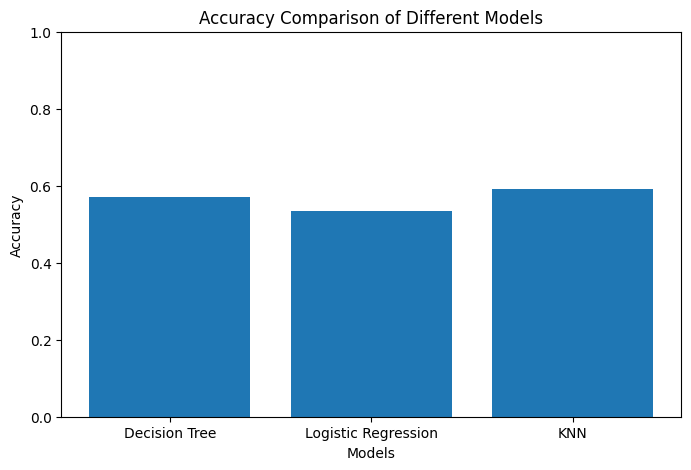

In [ ]:
# Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Generate a random dataset (3 columns, 350 rows)
np.random.seed(42)

X = np.random.rand(350, 3)   # 3 feature columns
y = np.random.randint(0, 2, 350)  # binary target (0 or 1)

# Create DataFrame
data = pd.DataFrame(X, columns=["Feature1", "Feature2", "Feature3"])
data["Target"] = y

print(data.head())

# Split dataset into training and testing sets

X = data.drop("Target", axis=1)
y = data["Target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Model 1: Decision Tree Classifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

# Model 2: Logistic Regression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)

# Model 3: K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

# Display accuracy of all models

print("Decision Tree Accuracy :", dt_accuracy)
print("Logistic Regression Accuracy :", lr_accuracy)
print("KNN Accuracy :", knn_accuracy)


# Plot accuracy comparison of models

models = ["Decision Tree", "Logistic Regression", "KNN"]
accuracies = [dt_accuracy, lr_accuracy, knn_accuracy]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Different Models")
plt.ylim(0, 1)
plt.show()

In [ ]:
# 7. Using the diabetes dataset, implement a Decision Tree Classifier and plot ccp_alpha of built tree against any one DT parameter (node count or maximum depth). please add comments for reading and understanding

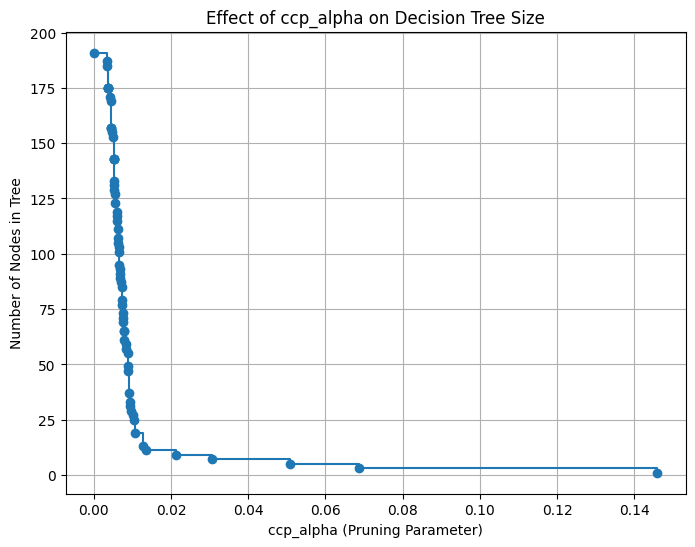

In [ ]:
# Import required libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Load the diabetes dataset

# Load dataset
data = pd.read_csv("diabetes.csv")

# Rename columns to match the expected names
data.columns = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# Separate features and target
X = data.drop("label", axis=1)
y = data["label"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Create a full decision tree
dt = DecisionTreeClassifier(
    criterion="entropy",
    random_state=42
)

dt.fit(X_train, y_train)

# Obtain pruning path
path = dt.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas = path.ccp_alphas       # effective alphas
impurities = path.impurities       # corresponding impurities

node_counts = []

# Train a tree for each alpha and store number of nodes
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        criterion="entropy",
        random_state=42,
        ccp_alpha=alpha
    )
    clf.fit(X_train, y_train)
    node_counts.append(clf.tree_.node_count)

# Plot: ccp_alpha vs Number of Nodes

plt.figure(figsize=(8, 6))

plt.plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")

plt.xlabel("ccp_alpha (Pruning Parameter)")
plt.ylabel("Number of Nodes in Tree")
plt.title("Effect of ccp_alpha on Decision Tree Size")
plt.grid(True)

plt.show()

In [ ]:
# 23. Write a Python code to perform Leave-One-Out Cross-Validation (LOOCV) on a dataset using a Decision Tree Classifier. The dataset consists of features and labels as specified below. Dataset Description: • The dataset consists of 100 samples with 5 features. • The target variable is binary (0 or 1). Instructions: Import the necessary libraries. • Load or create a synthetic dataset with the specified characteristics. • Implement Leave-One-Out Cross-Validation (LOOCV). • Train a Decision Tree Classifier on each training set and evaluate it on the left-out sample. Print the accuracy for each iteration and the average accuracy across all iterations.

In [ ]:
# 1. Import necessary libraries
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

# 2. Create a synthetic dataset
# 100 samples, 5 features
np.random.seed(42)   # For reproducibility

X = np.random.rand(100, 5)           # Feature matrix
y = np.random.randint(0, 2, 100)     # Binary target labels (0 or 1)

# 3. Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Create Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
# 4. Perform LOOCV
accuracies = []   # To store accuracy of each iteration
iteration = 1

for train_index, test_index in loo.split(X):

    # Split data into training and test sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the left-out sample
    y_pred = model.predict(X_test)

    # Calculate accuracy for this iteration
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    # Print accuracy for this iteration
    print(f"Iteration {iteration}: Accuracy = {acc}")
    iteration += 1

# 5. Calculate and print average accuracy
average_accuracy = np.mean(accuracies)
print("\nAverage LOOCV Accuracy:", average_accuracy)


Iteration 1: Accuracy = 0.0
Iteration 2: Accuracy = 0.0
Iteration 3: Accuracy = 0.0
Iteration 4: Accuracy = 0.0
Iteration 5: Accuracy = 0.0
Iteration 6: Accuracy = 1.0
Iteration 7: Accuracy = 0.0
Iteration 8: Accuracy = 0.0
Iteration 9: Accuracy = 0.0
Iteration 10: Accuracy = 0.0
Iteration 11: Accuracy = 1.0
Iteration 12: Accuracy = 0.0
Iteration 13: Accuracy = 0.0
Iteration 14: Accuracy = 1.0
Iteration 15: Accuracy = 1.0
Iteration 16: Accuracy = 1.0
Iteration 17: Accuracy = 1.0
Iteration 18: Accuracy = 0.0
Iteration 19: Accuracy = 1.0
Iteration 20: Accuracy = 0.0
Iteration 21: Accuracy = 1.0
Iteration 22: Accuracy = 0.0
Iteration 23: Accuracy = 1.0
Iteration 24: Accuracy = 1.0
Iteration 25: Accuracy = 1.0
Iteration 26: Accuracy = 0.0
Iteration 27: Accuracy = 0.0
Iteration 28: Accuracy = 0.0
Iteration 29: Accuracy = 1.0
Iteration 30: Accuracy = 1.0
Iteration 31: Accuracy = 1.0
Iteration 32: Accuracy = 0.0
Iteration 33: Accuracy = 1.0
Iteration 34: Accuracy = 1.0
Iteration 35: Accuracy 

In [ ]:
# 24. Write a Python code to perform Leave-One-Out Cross-Validation (LOOCV) on a dataset using a Decision Tree Classifier. The dataset consists of features and labels as specified below. Dataset Description: • The dataset consists of 150 samples with 10 features. • The target variable is categorical with three classes (0, 1, 2). • Introduce some noise to the dataset to make the classification task more Instructions: • Import the necessary libraries. • Load or create a synthetic dataset with the specified characteristics (make_classification), including noise. • Implement Leave-One-Out Cross-Validation (LOOCV). • Train a Decision Tree Classifier on each training set and evaluate it on the left-out sample. • Calculate and print the accuracy for each iteration, as well as the confusion matrix for the final model. • Calculate and print the average accuracy across all iterations. Print confusion matrix and classificarion report.

In [ ]:
# 1. Import necessary libraries
import numpy as np
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Create a synthetic dataset with noise
# 150 samples, 10 features, 3 classes
# flip_y introduces label noise
X, y = make_classification(
    n_samples=150,
    n_features=10,
    n_informative=7,
    n_redundant=2,
    n_classes=3,
    flip_y=0.15,          # noise in labels
    class_sep=1.0,
    random_state=42
)

# 3. Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(
    criterion="entropy",
    random_state=42
)

# 4. Perform LOOCV
accuracies = []     # To store accuracy of each iteration
iteration = 1

for train_index, test_index in loo.split(X):

    # Split the dataset
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    dt_model.fit(X_train, y_train)

    # Predict the left-out sample
    y_pred = dt_model.predict(X_test)

    # Accuracy for this iteration (0 or 1)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    print(f"Iteration {iteration}: Accuracy = {acc}")
    iteration += 1

# 5. Calculate and print average accuracy
average_accuracy = np.mean(accuracies)
print("\nAverage LOOCV Accuracy:", average_accuracy)


Iteration 1: Accuracy = 1.0
Iteration 2: Accuracy = 0.0
Iteration 3: Accuracy = 0.0
Iteration 4: Accuracy = 0.0
Iteration 5: Accuracy = 0.0
Iteration 6: Accuracy = 0.0
Iteration 7: Accuracy = 0.0
Iteration 8: Accuracy = 0.0
Iteration 9: Accuracy = 1.0
Iteration 10: Accuracy = 1.0
Iteration 11: Accuracy = 1.0
Iteration 12: Accuracy = 0.0
Iteration 13: Accuracy = 0.0
Iteration 14: Accuracy = 0.0
Iteration 15: Accuracy = 1.0
Iteration 16: Accuracy = 0.0
Iteration 17: Accuracy = 0.0
Iteration 18: Accuracy = 1.0
Iteration 19: Accuracy = 1.0
Iteration 20: Accuracy = 1.0
Iteration 21: Accuracy = 1.0
Iteration 22: Accuracy = 1.0
Iteration 23: Accuracy = 1.0
Iteration 24: Accuracy = 0.0
Iteration 25: Accuracy = 1.0
Iteration 26: Accuracy = 1.0
Iteration 27: Accuracy = 1.0
Iteration 28: Accuracy = 1.0
Iteration 29: Accuracy = 1.0
Iteration 30: Accuracy = 0.0
Iteration 31: Accuracy = 0.0
Iteration 32: Accuracy = 1.0
Iteration 33: Accuracy = 1.0
Iteration 34: Accuracy = 0.0
Iteration 35: Accuracy 

Naïve Bayes Classifier

In [ ]:
# 44. The breast cancer dataset is available in the sklearn.datasets module and can be loaded using load_breast_cancer(). implement a Naive Bayes Classifier on the Breast Cancer Dataset using python's sklearn library. Assume that all features of datasets are continuous variables and must be used for building model. Perform following task. load data set, Split data for training and testing, Build a model and Predict labels of test data.

In [ ]:
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data        # Features (all continuous)
y = data.target      # Labels

# 2. Split the dataset into training and testing sets
# 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Build the Naive Bayes model (Gaussian NB for continuous data)
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# 4. Predict labels for the test data
y_pred = model.predict(X_test)

# 5. Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9415204678362573

Confusion Matrix:
 [[ 57   6]
 [  4 104]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92        63
           1       0.95      0.96      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



In [ ]:
# 45. Implement a Gaussian Naive Bayes classifier to predict whether a patient has diabetes based on various health metrics of PIMA.csv dataset. The dataset consists of information from 768 female Pima Indians aged 21 and older, initially gathered by the National Institute of Diabetes and Digestive and Kidney Diseases. Target variable: Diabetes (binary, 0 or 1) Attributes: Pregnancies, OGTT (Oral Glucose Tolerance Test), Blood pressure, Skin thickness, Insulin, BMI (Body Mass Index), Age, Pedigree diabetes function.Load the Dataset from a CSV file. Provide summary statistics for the dataset. Split the data into training and testing sets (80% train, 20% test). Instantiate a Gaussian Naive Bayes model and fit it on the training data. Predict diabetes status for the test set. Discuss any biases in the dataset and how they may affect model performance

In [ ]:
# Load Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define column names based on the dataset description
column_names = [
    'Pregnancies', 'OGTT', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'Pedigree', 'Age', 'Diabetes'
]

# Load dataset - using header=None because the file lacks a header row
data = pd.read_csv("PIMA.csv", header=None, names=column_names)

# Provide summary statistics
print("Summary Statistics:")
print(data.describe())

# Separate features and target
X = data.drop("Diabetes", axis=1)
y = data["Diabetes"]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Instantiate and fit Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict diabetes status for the test set
y_pred = gnb.predict(X_test)

# Evaluate the model
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Summary Statistics:
       Pregnancies        OGTT  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI    Pedigree         Age    Diabetes  
count  768.000000  768.000000  768.000000  768.000000  
mean    31.992578    0.471876   33.240885    0.348958  
std      7.884160    0.331329   11.760232    0.476951  
min      0.000000    0.078000   21.000000    0.000000  
25%     27.3000

In [ ]:
# 46. Build a Naive Bayes classifier to analyze the sentiment of movie reviews (positive or negative). The IMDB_Dataset.csv typically contains two main columns: Review: The text of the movie review. Sentiment: A label indicating the sentiment of the review, usually categorized as 'positive' or 'negative'. Load the dataset and inspect the structure. Clean the text data by removing punctuation, converting to lowercase, and tokenizing the reviews.Use CountVectorizer or TfidfVectorizer to convert the text data into a numerical format suitable for model training. Split the dataset and Create a Multinomial Naive Bayes model and fit it on the training data. Predict the sentiment of the test reviews.

In [ ]:
# Import Libraries

import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# 1. Load dataset
# Using engine='python' and on_bad_lines='skip' to handle formatting issues (unclosed quotes)
data = pd.read_csv("IMDB_Dataset.csv", engine='python', on_bad_lines='skip')

# 2. Clean text
def clean_text(text):
    text = str(text).lower()                 # lowercase
    text = re.sub(r'[^\w\s]', '', text)     # remove punctuation
    return text

# Note: Actual column names are lowercase 'review' and 'sentiment'
data['review'] = data['review'].apply(clean_text)

# 3. Features and labels
X = data['review']
y = data['sentiment']

# 4. Convert text to numbers
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(X)

# 5. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# 7. Predict and check accuracy
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8532469746037157


In [ ]:
# Import Required Libraries

from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Load dataset (all categories)
data = fetch_20newsgroups(subset='all')

# Explore dataset
print("Number of documents:", len(data.data))
print("Number of categories:", len(data.target_names))
print("\nCategories:\n", data.target_names)

# Split Data into Features and Labels

X = data.data        # Text documents
y = data.target      # Category labels

# Convert Text to Numerical Features (CountVectorizer)

vectorizer = CountVectorizer(
    stop_words='english',
    max_features=5000
)

X_vectors = vectorizer.fit_transform(X)

# Train–Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X_vectors, y, test_size=0.2, random_state=42
)

# Build and Train Multinomial Naive Bayes Model

model = MultinomialNB()
model.fit(X_train, y_train)

# Predict and Print Accuracy

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Number of documents: 18846
Number of categories: 20

Categories:
 ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
Model Accuracy: 0.8188328912466843


Support Vector Machines (SVM)

In [ ]:
# 3. Implement a Decision Tree Classifier and compare its performance with a SVM Classifier on the iris dataset. Display the accuracy of both models.

In [ ]:
# Import required libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# Decision Tree Classifier
# -------------------------------
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

# -------------------------------
# Support Vector Machine (SVM)
# -------------------------------
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Display results
print("Decision Tree Accuracy:", dt_accuracy)
print("SVM Accuracy:", svm_accuracy)

Decision Tree Accuracy: 1.0
SVM Accuracy: 1.0


In [ ]:
# 21. Write a Python code to perform k-fold cross-validation on the dataset using a Support Vector Machine (SVM) classifier. Use the following steps:
# • Import necessary libraries.
# • Prepare the dataset synthetically using make_classification.

# • Preprocess the data if necessary (e.g., scaling).
# • Implement k-fold cross-validation with 10 folds.
# • Train the SVM classifier on the training set and evaluate it on the test set for each fold.
# • Print the accuracy for each fold and the average accuracy across all folds.
# Dataset Description:
# • The dataset consists of 100 samples with 20 features.
# The target variable is binary (0 or 1).

In [ ]:
# Step 1: Import necessary libraries
import numpy as np
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Step 2: Prepare synthetic dataset
X, y = make_classification(
    n_samples=100,
    n_features=20,
    n_informative=15,  # number of informative features
    n_redundant=5,     # number of redundant features
    n_classes=2,
    random_state=42
)

# Step 3: Preprocess the data (Scaling)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 4: Implement k-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_accuracies = []

# Step 5: Train and evaluate SVM on each fold
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize SVM classifier
    svm = SVC(kernel='linear', random_state=42)  # You can also try 'rbf'

    # Train the model
    svm.fit(X_train, y_train)

    # Predict on the test set
    y_pred = svm.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    fold_accuracies.append(accuracy)

    print(f"Accuracy for fold {fold}: {accuracy:.4f}")

# Step 6: Print average accuracy across all folds
average_accuracy = np.mean(fold_accuracies)
print(f"\nAverage Accuracy across 10 folds: {average_accuracy:.4f}")


Accuracy for fold 1: 0.7000
Accuracy for fold 2: 0.6000
Accuracy for fold 3: 0.9000
Accuracy for fold 4: 0.6000
Accuracy for fold 5: 0.8000
Accuracy for fold 6: 0.7000
Accuracy for fold 7: 1.0000
Accuracy for fold 8: 0.5000
Accuracy for fold 9: 1.0000
Accuracy for fold 10: 0.8000

Average Accuracy across 10 folds: 0.7600


In [ ]:
# 26. Write a Python code to perform a Grid Search with Cross-Validation on the Iris dataset using a Support Vector Machine (SVM) classifier. The goal is to find the best hyperparameters for the SVM model.

# Dataset Description:
# • The Iris dataset consists of 150 samples with 4 features.
# • The target variable is categorical with three classes (Setosa, Versicolor, Virginica).
# Instructions:
# • Import the necessary libraries.
# • Load the Iris dataset from sklearn.datasets.
# • Split the dataset into features and labels.
# • Implement a Grid Search with 5-fold Cross-Validation to find the best hyperparameters for the SVM classifier. Consider the following hyperparameters: C: [0.1, 1, 10, 100] kernel: ['linear', 'rbf'] gamma: ['scale', 'auto']
# • Print the best hyperparameters found by the Grid Search.
# • Evaluate the best model on the entire dataset and print the accuracy.
# Generate and visualize the confusion matrix for the best model.

Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy of the best model on the entire dataset: 0.9933


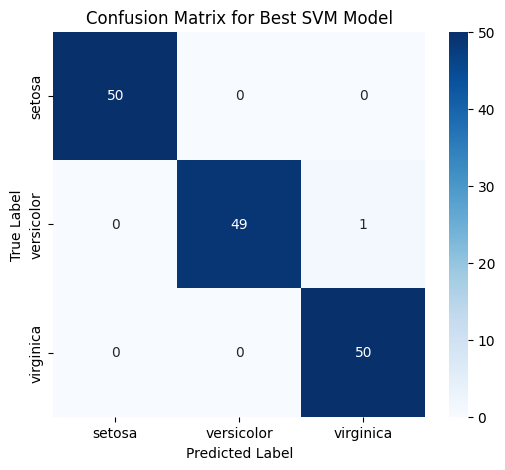

In [ ]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 2: Load the Iris dataset
iris = load_iris()
X = iris.data        # Features
y = iris.target      # Labels

# Step 3: Define SVM classifier
svm = SVC()

# Step 4: Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Step 5: Set up Grid Search with 5-fold Cross-Validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Step 6: Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Step 7: Evaluate the best model on the entire dataset
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy of the best model on the entire dataset: {accuracy:.4f}")

# Step 8: Generate and visualize the confusion matrix
cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Best SVM Model')
plt.show()

In [ ]:
# 29. You are using a Support Vector Machine (SVM) classifier for a dataset that has 3 features and 500 data points.
# If you increase the dimensionality from 3 features to 12 features, explain how the volume of the feature space changes. What are the potential challenges that arise from this increase in dimensionality?
# Instructions:
# • Provide detailed answers to both questions, incorporating concepts from machine learning and geometry.
# • Use diagrams or examples where appropriate to illustrate your points.
# Discuss the implications of high-dimensional spaces on model performance, including overfitting, computational complexity, and the curse of dimensionality.

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# -----------------------------
# Step 1: Generate synthetic dataset
# -----------------------------

# Dataset with 3 features
X_3, y_3 = make_classification(
    n_samples=500,        # 500 data points
    n_features=3,         # 3 features
    n_informative=3,      # all features are informative
    n_redundant=0,
    n_classes=2,
    random_state=42
)

# Dataset with 12 features
X_12, y_12 = make_classification(
    n_samples=500,
    n_features=12,        # 12 features
    n_informative=8,      # 8 informative, 4 redundant
    n_redundant=4,
    n_classes=2,
    random_state=42
)

# -----------------------------
# Step 2: Feature scaling
# SVM is sensitive to feature scales
# -----------------------------
scaler_3 = StandardScaler()
X_3_scaled = scaler_3.fit_transform(X_3)

scaler_12 = StandardScaler()
X_12_scaled = scaler_12.fit_transform(X_12)

# -----------------------------
# Step 3: Train SVM and evaluate using cross-validation
# -----------------------------
svm_model = SVC(kernel='linear', random_state=42)

# Evaluate on 3-feature dataset using 5-fold CV
scores_3 = cross_val_score(svm_model, X_3_scaled, y_3, cv=5, scoring='accuracy')
print("3-Feature Dataset:")
print("Accuracy per fold:", scores_3)
print("Average accuracy:", np.mean(scores_3))
print()

# Evaluate on 12-feature dataset using 5-fold CV
scores_12 = cross_val_score(svm_model, X_12_scaled, y_12, cv=5, scoring='accuracy')
print("12-Feature Dataset:")
print("Accuracy per fold:", scores_12)
print("Average accuracy:", np.mean(scores_12))
print()

3-Feature Dataset:
Accuracy per fold: [0.88 0.85 0.88 0.87 0.91]
Average accuracy: 0.8779999999999999

12-Feature Dataset:
Accuracy per fold: [0.78 0.77 0.79 0.76 0.78]
Average accuracy: 0.776



In [ ]:
# 41. Consider Social_Netwok_Ads.csv dataset - (UserID, Gender, Age, EstimatedSalary, Purchased). Use Age and EstimatedSalary as input features and Purchased as target feature. Split test data set 30% of complete dataset. Build two models of support vector classifier in python using sklearn library, one for linear and another for RBF kernel with C and gamma parameters set. Predict test labels and print test accuracy.

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# -----------------------------
# Step 1: Load the dataset
# -----------------------------
data = pd.read_csv("Social_Network_Ads.csv")

# Select features and target
X = data[['Age', 'EstimatedSalary']].values
y = data['Purchased'].values

# -----------------------------
# Step 2: Split the dataset
# 70% train, 30% test
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -----------------------------
# Step 3: Feature scaling
# SVM is sensitive to feature scales
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# Step 4: Build and train SVM models
# -----------------------------

# Linear SVM
linear_svm = SVC(kernel='linear', C=1.0, random_state=42)
linear_svm.fit(X_train_scaled, y_train)

# RBF SVM
rbf_svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
rbf_svm.fit(X_train_scaled, y_train)

# -----------------------------
# Step 5: Predict test labels
# -----------------------------
y_pred_linear = linear_svm.predict(X_test_scaled)
y_pred_rbf = rbf_svm.predict(X_test_scaled)

# -----------------------------
# Step 6: Calculate and print accuracy
# -----------------------------
accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"Test Accuracy (Linear SVM): {accuracy_linear:.4f}")
print(f"Test Accuracy (RBF SVM): {accuracy_rbf:.4f}")


Test Accuracy (Linear SVM): 0.8500
Test Accuracy (RBF SVM): 0.9417


In [ ]:
# 42. Develop a Support Vector Classifier to predict whether a tumor is malignant or benign based on 30 features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. The dataset contains 569 samples with binary labels indicating tumor type. (breast_cancer dataset of sklearn) Load the Dataset from sklearn.Split the dataset into training and testing sets.Train the SVC Model using the training data. Visualize the Results.

Feature shape: (569, 30), Labels shape: (569,)
Class names: ['malignant' 'benign']
Test Accuracy: 0.9766


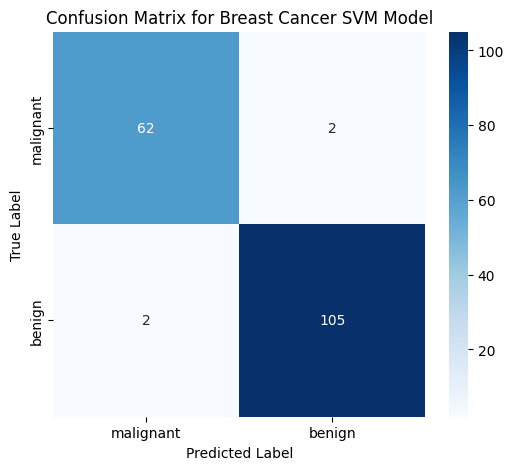

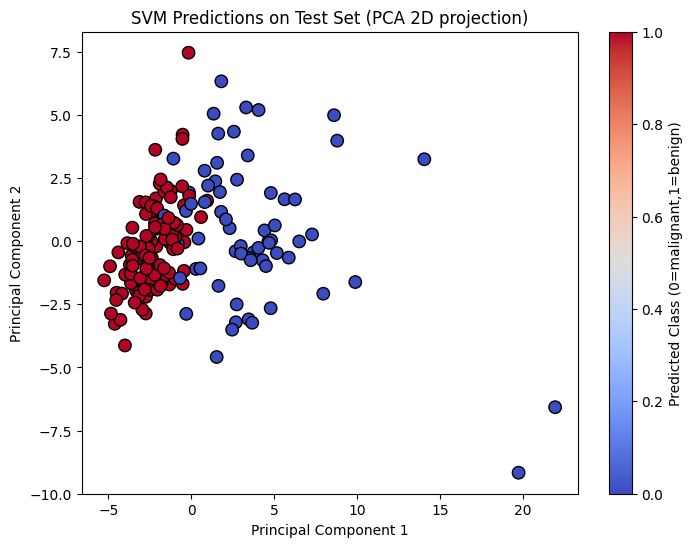

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# -----------------------------
# Step 1: Load the Breast Cancer dataset
# -----------------------------
data = load_breast_cancer()
X = data.data        # 30 features from FNA
y = data.target      # 0 = malignant, 1 = benign

print(f"Feature shape: {X.shape}, Labels shape: {y.shape}")
print(f"Class names: {data.target_names}")

# -----------------------------
# Step 2: Split the dataset
# 70% training, 30% testing
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# -----------------------------
# Step 3: Feature scaling
# StandardScaler ensures features are on similar scale for SVM
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# Step 4: Train the SVM classifier
# Using RBF kernel (good for non-linear separation)
# -----------------------------
svc_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svc_model.fit(X_train_scaled, y_train)

# -----------------------------
# Step 5: Predict on test data
# -----------------------------
y_pred = svc_model.predict(X_test_scaled)

# -----------------------------
# Step 6: Evaluate the model
# -----------------------------
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# -----------------------------
# Step 7: Visualize the results
# -----------------------------
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Breast Cancer SVM Model')
plt.show()

# Optional: Scatter plot using first two principal components for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c=y_pred, cmap='coolwarm', edgecolors='k', s=80)
plt.title('SVM Predictions on Test Set (PCA 2D projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Predicted Class (0=malignant,1=benign)')
plt.show()

In [ ]:
# 43. Write a Python program to implement SVM classification for breast cancerprediction with the following requirements: Data preprocessing using StandardScaler use kernel parameters for tuning.

Dataset shape: (569, 30), Target shape: (569,)
Best Hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Test Accuracy of best SVM model: 0.9708


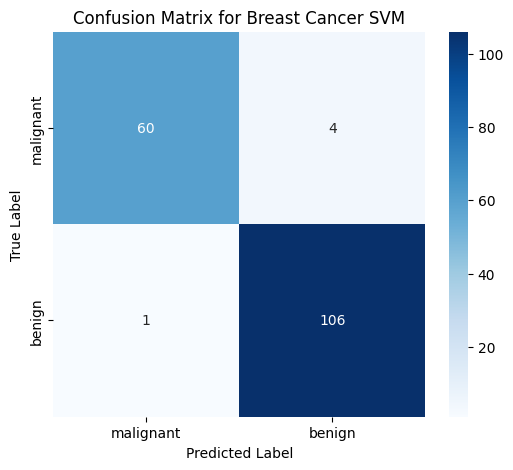

In [ ]:
# -----------------------------
# Step 1: Import necessary libraries
# -----------------------------
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# -----------------------------
# Step 2: Load the Breast Cancer dataset
# -----------------------------
data = load_breast_cancer()
X = data.data       # 30 features
y = data.target     # 0 = malignant, 1 = benign

print(f"Dataset shape: {X.shape}, Target shape: {y.shape}")

# -----------------------------
# Step 3: Split the dataset
# 70% train, 30% test
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# -----------------------------
# Step 4: Feature scaling
# StandardScaler standardizes features to mean=0 and std=1
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# Step 5: SVM with hyperparameter tuning
# Using GridSearchCV to tune kernel, C, and gamma
# -----------------------------
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}

svc = SVC(random_state=42)
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best parameters from grid search
print("Best Hyperparameters:", grid_search.best_params_)

# -----------------------------
# Step 6: Evaluate the best model
# -----------------------------
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy of best SVM model: {accuracy:.4f}")

# -----------------------------
# Step 7: Confusion matrix visualization
# -----------------------------
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Breast Cancer SVM')
plt.show()

In [ ]:
# 70. Implement an SVC model to classify iris flowers into three species (Setosa, Versicolor, and Virginica) based on their sepal and petal dimensions. The dataset contains 150 samples with four features: sepal length, sepal width, petal length, and petal width. Load the Dataset from sklearn.Split the dataset into training and testing sets.Train the SVC Model using the training data. Visualize the Results.

Dataset shape: (150, 4), Target shape: (150,)
Test Accuracy: 0.9333


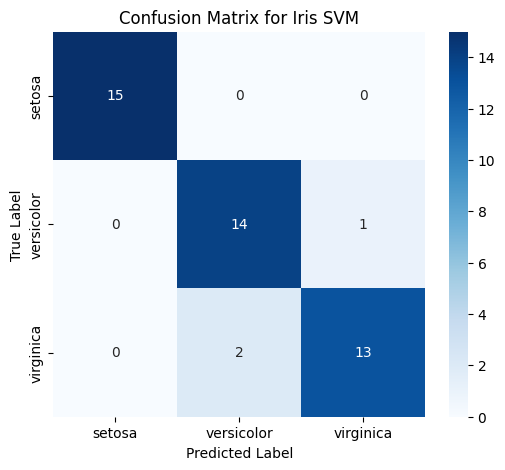

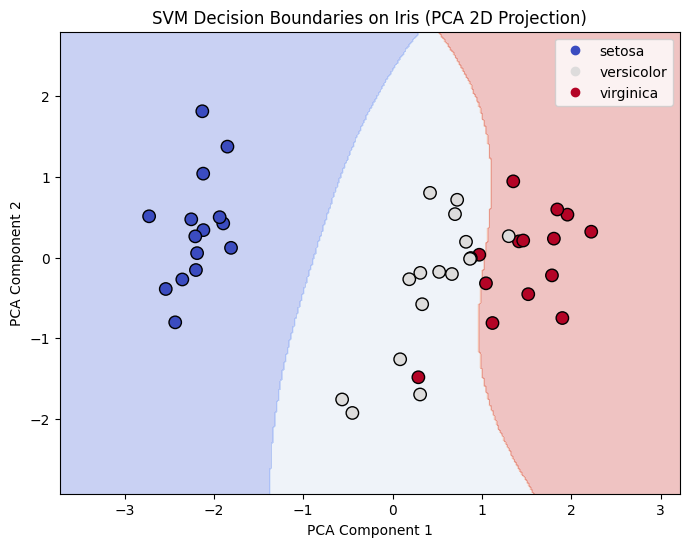

In [ ]:
# -----------------------------
# Step 1: Import necessary libraries
# -----------------------------
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

# -----------------------------
# Step 2: Load the Iris dataset
# -----------------------------
iris = load_iris()
X = iris.data        # 4 features: sepal length, sepal width, petal length, petal width
y = iris.target      # 0=Setosa, 1=Versicolor, 2=Virginica
target_names = iris.target_names

print(f"Dataset shape: {X.shape}, Target shape: {y.shape}")

# -----------------------------
# Step 3: Split the dataset
# 70% training, 30% testing
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# -----------------------------
# Step 4: Feature scaling
# SVM is sensitive to feature scales
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# Step 5: Train the SVM classifier
# Using RBF kernel (handles non-linear separation)
# -----------------------------
svc_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svc_model.fit(X_train_scaled, y_train)

# -----------------------------
# Step 6: Predict test labels
# -----------------------------
y_pred = svc_model.predict(X_test_scaled)

# -----------------------------
# Step 7: Evaluate model
# -----------------------------
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Iris SVM')
plt.show()

# -----------------------------
# Step 8: Visualize decision boundaries using PCA (2D projection)
# -----------------------------
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train SVM again on PCA-reduced 2D data for visualization
svc_2d = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svc_2d.fit(X_train_pca, y_train)

# Create meshgrid for plotting decision boundaries
x_min, x_max = X_test_pca[:,0].min() - 1, X_test_pca[:,0].max() + 1
y_min, y_max = X_test_pca[:,1].min() - 1, X_test_pca[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = svc_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
scatter = plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c=y_test, cmap='coolwarm', edgecolors='k', s=80)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('SVM Decision Boundaries on Iris (PCA 2D Projection)')
# Fix: Convert target_names (numpy array) to a list to avoid boolean ambiguity error
plt.legend(handles=scatter.legend_elements()[0], labels=target_names.tolist())
plt.show()

Logistic Regression

In [1]:
# 5. Implement a Decision Tree Classifier and compare its performance with a Logistic Classifier on the diabetes dataset. Develop Python code to display the accuracy of both models.

In [2]:
# Import required libraries
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the diabetes dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target)

# Convert the continuous target into a binary classification problem
# (target > median -> 1, else 0)
median_value = y.median()
y_binary = (y > median_value).astype(int)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=42
)

# Initialize models
dt_model = DecisionTreeClassifier(random_state=42)
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train models
dt_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Display results
print(f"Decision Tree Classifier Accuracy: {accuracy_dt:.2f}")
print(f"Logistic Regression Classifier Accuracy: {accuracy_lr:.2f}")


Decision Tree Classifier Accuracy: 0.67
Logistic Regression Classifier Accuracy: 0.74


In [3]:
# 48. Imagine a telecommunications company that wants to predict whether a customer will churn (leave the service) based on various features such as age, account length, and monthly charges. The company has historical data on customers, including whether they churned or not.
# Age: (in years), Account_Length: (in months), Monthly_Charges: (in dollars)
# Churn: Target variable (1 if the customer churned, 0 otherwise)
# 'Age': [25, 34, 45, 29, 50, 38, 42, 35, 48, 55],
# 'Account_Length': [12, 24, 36, 18, 48, 30, 42, 24, 36, 60],
# 'Monthly_Charges': [70, 90, 80, 100, 60, 80, 90, 70, 80, 100],
# 'Churn': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
# build a logistic regression model using python that can predict the probability of a customer churning by spliting 80% of given data for training. Predict targets on trained model of test data. Print accuracy

In [4]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 2: Create the dataset
data = {
    'Age': [25, 34, 45, 29, 50, 38, 42, 35, 48, 55],
    'Account_Length': [12, 24, 36, 18, 48, 30, 42, 24, 36, 60],
    'Monthly_Charges': [70, 90, 80, 100, 60, 80, 90, 70, 80, 100],
    'Churn': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
}

df = pd.DataFrame(data)

# Step 3: Split into features (X) and target (y)
X = df[['Age', 'Account_Length', 'Monthly_Charges']]
y = df['Churn']

# Step 4: Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 6: Predict on test data
y_pred = model.predict(X_test)

# Step 7: Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test data:", accuracy)

# Optional: Predict probability of churn for test data
y_prob = model.predict_proba(X_test)[:, 1]
print("\nPredicted probabilities of churn for test data:")
print(y_prob)


Accuracy on test data: 0.5

Predicted probabilities of churn for test data:
[0.7266956  0.81086448]


In [5]:
# 49. build a logistic regression model that can predict whether a customer is likely to churn based on the features in file named customer_churn.csv.
# customer_id: Unique customer ID, age: Customer age,
# gender: Customer gender (male/female)
# account_length: Length of the customer's account (in months)
# international_plan: Whether the customer has an international plan (yes/no)
# voice_mail_plan: Whether the customer has a voice mail plan (yes/no)
# number_vmail_messages: Number of voice mail messages
# total_day_calls: Total day calls
# total_night_calls: Total night calls
# total_intl_calls: Total international calls
# • churn: Whether the customer churned (yes/no)

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv('customer_churn.csv')

# Standardize column names
df.columns = df.columns.str.lower().str.strip()

# Handle target column 'churn' safely
if 'churn' in df.columns:
    # If the column is text ('yes'/'no'), convert it.
    # If it's already numeric, this step is skipped to avoid creating NaNs.
    if df['churn'].dtype == object:
        df['churn'] = df['churn'].astype(str).str.lower().map({'yes': 1, 'no': 0})

    # Drop rows where the target might be missing
    df = df.dropna(subset=['churn'])
    df['churn'] = df['churn'].astype(int)

# Select only numerical features for X
# This ignores string columns like 'names' or 'company' which cannot be used in Logistic Regression
X = df.select_dtypes(include=[np.number]).drop('churn', axis=1, errors='ignore')
y = df['churn']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9


In [16]:
# 50. Use iris dataset for creating a binary classification problem that predicts whether a flower is of the species "Iris-Virginica" or not. Dataset Features: sepal_length, sepal_width, petal_length, petal_width (in cm) species: Species of the iris flower (Iris-setosa, Iris-versicolor, Iris-virginica). Make Predictions and Print Probabilities with Alter Threshold to 0.6.

In [17]:
# Step 1: Import libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 2: Load iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

# Step 3: Convert to binary classification (Iris-virginica = 1, else 0)
y_binary = (y == 2).astype(int)  # Iris-virginica is target 2

# Step 4: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Step 5: Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 6: Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]  # probability of class 1 (Iris-virginica)

# Step 7: Apply threshold = 0.6
threshold = 0.6
y_pred = (y_prob >= threshold).astype(int)

# Step 8: Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with threshold {threshold}:", accuracy)

# Step 9: Show predictions and probabilities
results = pd.DataFrame({
    'Predicted_Class': y_pred,
    'Probability_of_Virginica': y_prob,
    'Actual_Class': y_test.values
})
print("\nPredictions with altered threshold:\n", results)


Accuracy with threshold 0.6: 0.9666666666666667

Predictions with altered threshold:
     Predicted_Class  Probability_of_Virginica  Actual_Class
0                 0                  0.199214             0
1                 0                  0.000006             0
2                 1                  0.998526             1
3                 0                  0.207097             0
4                 0                  0.275323             0
5                 0                  0.000006             0
6                 0                  0.016243             0
7                 1                  0.820740             1
8                 0                  0.271844             0
9                 0                  0.031268             0
10                1                  0.728621             1
11                0                  0.000004             0
12                0                  0.000002             0
13                0                  0.000005             0
14            

Linear Regression

In [18]:
# 39. develop a linear regression model to predict house prices based on various features. You will use a dataset that contains information about houses, including features such as the number of bedrooms, square footage, and location. You will evaluate the model's performance using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared. Show performance of same model when PCA reduced data set is used.

In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA

# -----------------------------
# Step 1: Load Dataset
# -----------------------------
# Replace 'house_prices.csv' with your dataset path
df = pd.read_csv('House Price India.csv')

# Inspect the dataset
print("First 5 rows of dataset:\n", df.head())

# Define features and target
X = df.drop('Price', axis=1)  # Features
y = df['Price']               # Target variable

# -----------------------------
# Step 2: Preprocess Data
# -----------------------------
# Scale features for better regression performance and PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# Step 3: Split Dataset
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# -----------------------------
# Step 4: Linear Regression on Original Data
# -----------------------------
lr = LinearRegression()
lr.fit(X_train, y_train)             # Train model
y_pred = lr.predict(X_test)          # Predict on test set

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Original Data Performance ---")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

# -----------------------------
# Step 5: Apply PCA to Reduce Dimensions
# -----------------------------
pca = PCA(n_components=0.95)  # Keep 95% variance
X_pca = pca.fit_transform(X_scaled)

# Split PCA data into train and test
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

# -----------------------------
# Step 6: Linear Regression on PCA-Reduced Data
# -----------------------------
lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = lr_pca.predict(X_test_pca)

# Evaluate PCA model
mae_pca = mean_absolute_error(y_test_pca, y_pred_pca)
mse_pca = mean_squared_error(y_test_pca, y_pred_pca)
r2_pca = r2_score(y_test_pca, y_pred_pca)

print("\n--- PCA-Reduced Data Performance ---")
print(f"MAE: {mae_pca:.2f}")
print(f"MSE: {mse_pca:.2f}")
print(f"R2 Score: {r2_pca:.2f}")


First 5 rows of dataset:
            id   Date  number of bedrooms  number of bathrooms  living area  \
0  6762810145  42491                   5                 2.50         3650   
1  6762810635  42491                   4                 2.50         2920   
2  6762810998  42491                   5                 2.75         2910   
3  6762812605  42491                   4                 2.50         3310   
4  6762812919  42491                   3                 2.00         2710   

   lot area  number of floors  waterfront present  number of views  \
0      9050               2.0                   0                4   
1      4000               1.5                   0                0   
2      9480               1.5                   0                0   
3     42998               2.0                   0                0   
4      4500               1.5                   0                0   

   condition of the house  ...  Built Year  Renovation Year  Postal Code  \
0       

In [23]:
# 51. Consider Salary.csv , with years_of_experience and salary. Write a python code for fitting best fit simple linear regression with independent variable years_of_experience and dependent variable salary. Use complete dataset to train model. Plot :fitted model along with trained data points , residual plot.

Columns found in CSV: ['Rating', 'Company Name', 'Job Title', 'Salary', 'Salaries Reported', 'Location', 'Employment Status', 'Job Roles']

--- Model Performance ---
Mean Absolute Error (MAE): 439596.09
Mean Squared Error (MSE): 781619633100.25
R-squared (R2): 0.00


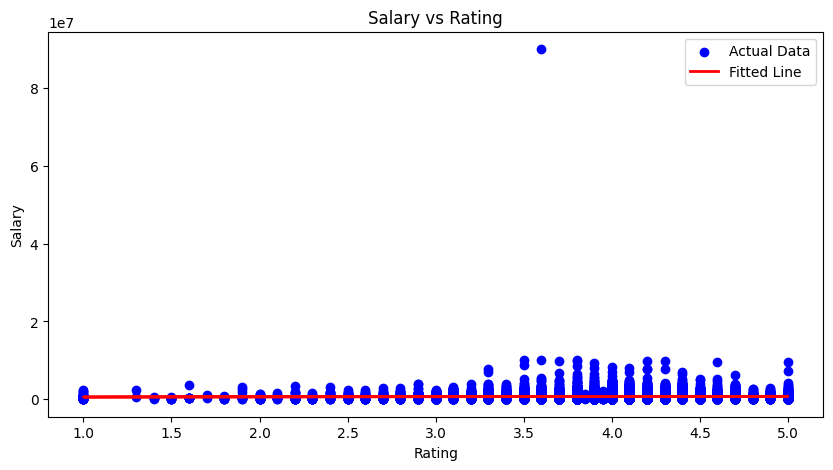

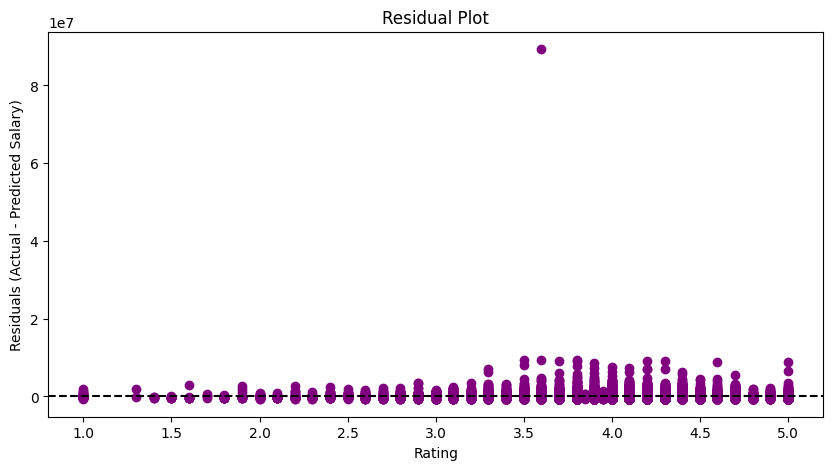

In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# -----------------------------
# Step 1: Load Dataset
# -----------------------------
df = pd.read_csv('Salary.csv')
print("Columns found in CSV:", df.columns.tolist())

# The error was caused by missing 'years_of_experience' and case-sensitivity for 'Salary'
# Based on your dataset output, we'll use 'Rating' as the independent variable
# and 'Salary' (capitalized) as the target.
# Replace 'Rating' with the correct column name if your file has a different experience column.

independent_var = 'Rating'  # Adjust this to the correct column name
dependent_var = 'Salary'    # Adjusted from 'salary' to 'Salary'

# Independent variable
X = df[[independent_var]].values
# Dependent variable
y = df[dependent_var].values

# -----------------------------
# Step 2: Train Simple Linear Regression Model
# -----------------------------
lr = LinearRegression()
lr.fit(X, y)  # Train using complete dataset

# Predicted salaries
y_pred = lr.predict(X)

# -----------------------------
# Step 3: Evaluate Model Performance
# -----------------------------
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("\n--- Model Performance ---")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# -----------------------------
# Step 4: Plot Fitted Regression Line
# -----------------------------
plt.figure(figsize=(10,5))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Fitted Line')
plt.title(f'{dependent_var} vs {independent_var}')
plt.xlabel(independent_var)
plt.ylabel(dependent_var)
plt.legend()
plt.show()

# -----------------------------
# Step 5: Residual Plot
# -----------------------------
residuals = y - y_pred

plt.figure(figsize=(10,5))
plt.scatter(X, residuals, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residual Plot')
plt.xlabel(independent_var)
plt.ylabel(f'Residuals (Actual - Predicted {dependent_var})')
plt.show()

In [27]:
# 52. Consider a dataset HousePrices.csv with columns square_feet and price. Write a Python code to fit a polynomial regression model with square_feet as the independent variable and price as the dependent variable. Use the complete dataset to train the model. Plot the fitted polynomial model along with the trained data points and create a residual plot.

Columns in dataset: ['id', 'Date', 'number of bedrooms', 'number of bathrooms', 'living area', 'lot area', 'number of floors', 'waterfront present', 'number of views', 'condition of the house', 'grade of the house', 'Area of the house(excluding basement)', 'Area of the basement', 'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude', 'Longitude', 'living_area_renov', 'lot_area_renov', 'Number of schools nearby', 'Distance from the airport', 'Price']

--- Polynomial Regression Model Performance ---
Degree of polynomial: 2
MAE: 162082.94
MSE: 61075930725.44
R2: 0.55


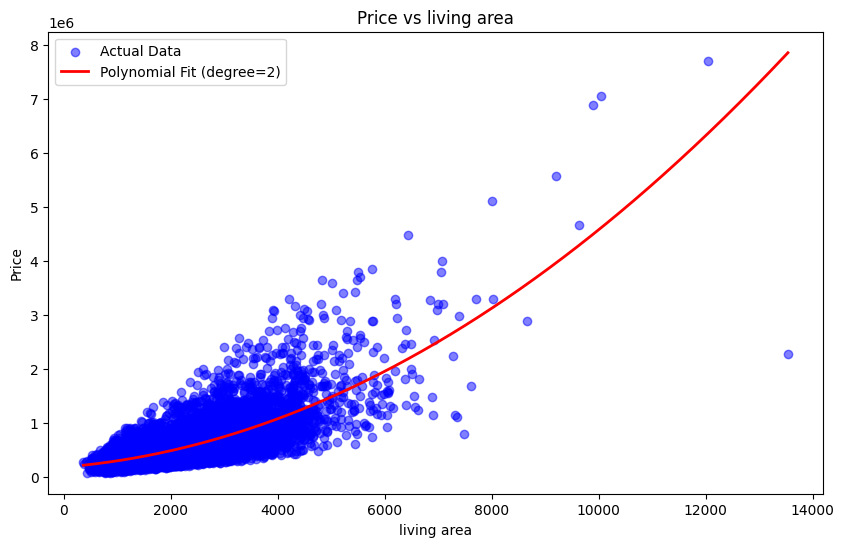

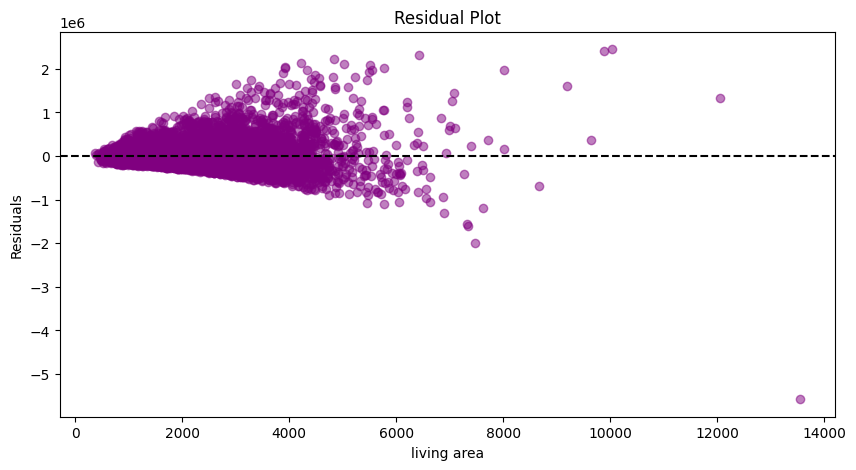

In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# -----------------------------
# Step 1: Load Dataset
# -----------------------------
df = pd.read_csv('House Price.csv')
print("Columns in dataset:", df.columns.tolist())

# Fix: Use correct column names from the dataset
# 'living area' instead of 'square_feet'
# 'Price' instead of 'price'
independent_var = 'living area'
dependent_var = 'Price'

# Independent variable
X = df[[independent_var]].values
# Dependent variable
y = df[dependent_var].values

# -----------------------------
# Step 2: Create Polynomial Features
# -----------------------------
degree = 2
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# -----------------------------
# Step 3: Train Polynomial Regression Model
# -----------------------------
model = LinearRegression()
model.fit(X_poly, y)

# Predicted prices
y_pred = model.predict(X_poly)

# -----------------------------
# Step 4: Evaluate Model Performance
# -----------------------------
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("\n--- Polynomial Regression Model Performance ---")
print(f"Degree of polynomial: {degree}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R2: {r2:.2f}")

# -----------------------------
# Step 5: Plot Fitted Polynomial Model
# -----------------------------
plt.figure(figsize=(10,6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Actual Data')

# Create smooth curve for plotting
X_curve = np.linspace(X.min(), X.max(), 500).reshape(-1,1)
X_curve_poly = poly.transform(X_curve)
y_curve = model.predict(X_curve_poly)

plt.plot(X_curve, y_curve, color='red', linewidth=2, label=f'Polynomial Fit (degree={degree})')
plt.title(f'{dependent_var} vs {independent_var}')
plt.xlabel(independent_var)
plt.ylabel(dependent_var)
plt.legend()
plt.show()

# -----------------------------
# Step 6: Residual Plot
# -----------------------------
residuals = y - y_pred

plt.figure(figsize=(10,5))
plt.scatter(X, residuals, color='purple', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residual Plot')
plt.xlabel(independent_var)
plt.ylabel('Residuals')
plt.show()

In [30]:
# 53. Consider a dataset CarPrices.csv with columns age, mileage, and price. Write a Python code to fit a multiple linear regression model with age and mileage as independent variables and price as the dependent variable. Use the complete dataset to train the model. Plot the actual prices against the predicted prices and create a residual plot.

Columns found in dataset: ['Brand', 'Model', 'Year', 'Engine_Size', 'Fuel_Type', 'Transmission', 'Mileage', 'Doors', 'Owner_Count', 'Price']

--- Multiple Linear Regression Performance ---
Mean Absolute Error (MAE): 1290.28
Mean Squared Error (MSE): 2502589.03
R-squared (R2): 0.74


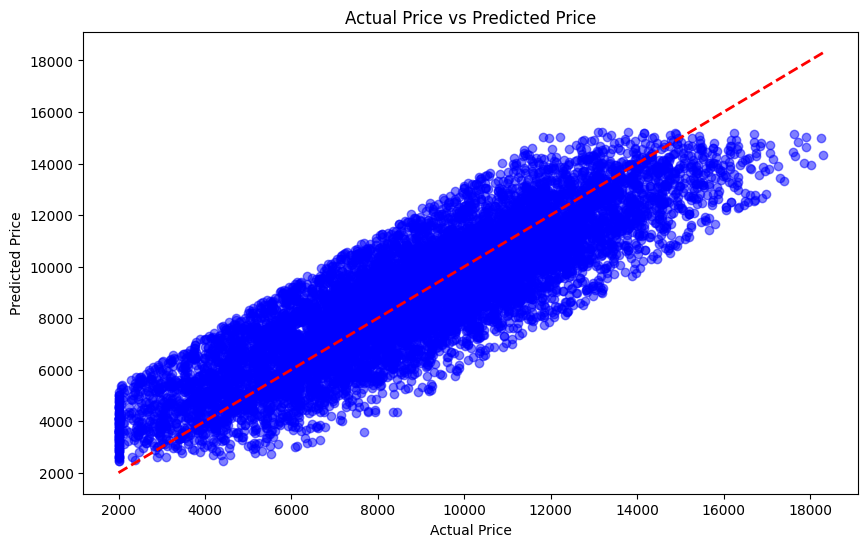

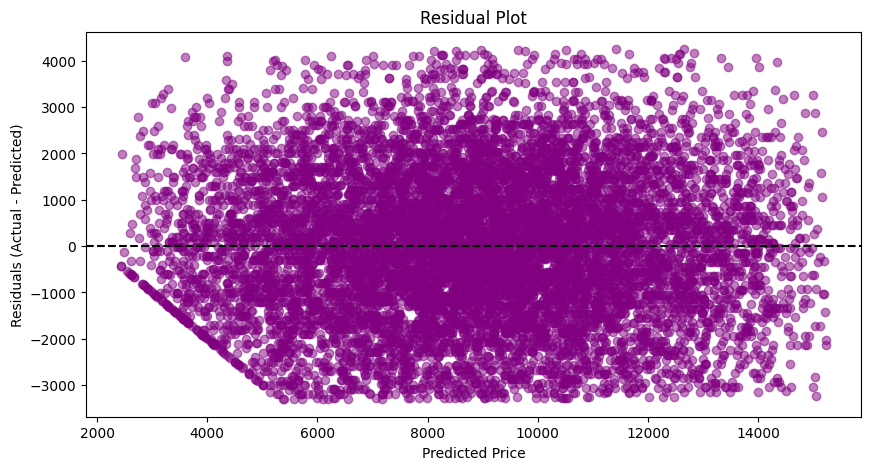

In [32]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# -----------------------------
# Step 1: Load Dataset
# -----------------------------
df = pd.read_csv('car_price_dataset.csv')
print("Columns found in dataset:", df.columns.tolist())

# Fix: The CSV has 'Year', 'Mileage', and 'Price' (capitalized).
# We calculate 'age' as (Current Year - Year).
current_year = datetime.now().year
df['age'] = current_year - df['Year']

# Independent variables (calculated age and Mileage)
X = df[['age', 'Mileage']].values
# Dependent variable (Price)
y = df['Price'].values

# -----------------------------
# Step 2: Train Multiple Linear Regression Model
# -----------------------------
model = LinearRegression()
model.fit(X, y)

# Predicted prices
y_pred = model.predict(X)

# -----------------------------
# Step 3: Evaluate Model Performance
# -----------------------------
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("\n--- Multiple Linear Regression Performance ---")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# -----------------------------
# Step 4: Plot Actual vs Predicted Prices
# -----------------------------
plt.figure(figsize=(10,6))
plt.scatter(y, y_pred, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2)
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

# -----------------------------
# Step 5: Residual Plot
# -----------------------------
residuals = y - y_pred

plt.figure(figsize=(10,5))
plt.scatter(y_pred, residuals, color='purple', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()

In [33]:
# 54. Consider a dataset HousePrices.csv with features such as size (in square feet) and a target column price (in dollars). Write a Python code to implement Linear Regression using Gradient Descent to predict price based on size. Use the complete dataset to train the model. Plot the regression line along with the training data points.

Columns found in dataset: ['id', 'Date', 'number of bedrooms', 'number of bathrooms', 'living area', 'lot area', 'number of floors', 'waterfront present', 'number of views', 'condition of the house', 'grade of the house', 'Area of the house(excluding basement)', 'Area of the basement', 'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude', 'Longitude', 'living_area_renov', 'lot_area_renov', 'Number of schools nearby', 'Distance from the airport', 'Price']
Iteration 0: MSE (Normalized) = 0.007177
Iteration 200: MSE (Normalized) = 0.001889
Iteration 400: MSE (Normalized) = 0.001653
Iteration 600: MSE (Normalized) = 0.001490
Iteration 800: MSE (Normalized) = 0.001377

Learned Parameters (Normalized): Intercept = 0.0233, Slope = 0.3022


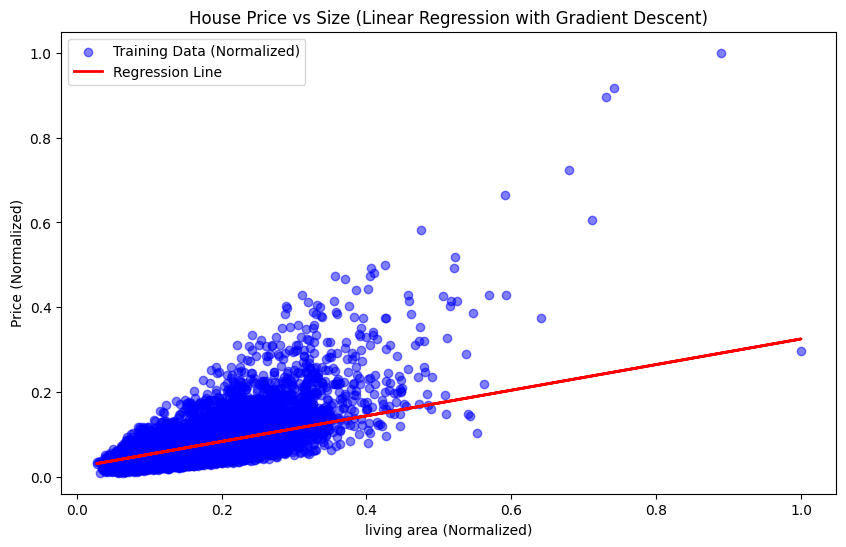

In [35]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Load Dataset
# -----------------------------
df = pd.read_csv('House Price.csv')
print("Columns found in dataset:", df.columns.tolist())

# Fix: Use correct column names from the dataset
# 'living area' instead of 'size'
# 'Price' instead of 'price'
independent_var = 'living area'
dependent_var = 'Price'

X_raw = df[independent_var].values
y_raw = df[dependent_var].values

# Feature Scaling (Normalization) is crucial for Gradient Descent to converge
# when dealing with large values like square footage and house prices.
X = X_raw / np.max(X_raw)
y = y_raw / np.max(y_raw)

m = len(y)

# -----------------------------
# Step 2: Initialize Parameters
# -----------------------------
theta0 = 0.0  # Intercept
theta1 = 0.0  # Slope
alpha = 0.1   # Learning rate (adjusted for normalized data)
iterations = 1000

# -----------------------------
# Step 3: Gradient Descent
# -----------------------------
for i in range(iterations):
    # Predicted values
    y_pred = theta0 + theta1 * X

    # Compute gradients
    d_theta0 = (-2/m) * np.sum(y - y_pred)
    d_theta1 = (-2/m) * np.sum((y - y_pred) * X)

    # Update parameters
    theta0 = theta0 - alpha * d_theta0
    theta1 = theta1 - alpha * d_theta1

    # Print progress
    if i % 200 == 0:
        loss = np.mean((y - y_pred) ** 2)
        print(f"Iteration {i}: MSE (Normalized) = {loss:.6f}")

print(f"\nLearned Parameters (Normalized): Intercept = {theta0:.4f}, Slope = {theta1:.4f}")

# -----------------------------
# Step 4: Plot Regression Line with Data
# -----------------------------
plt.figure(figsize=(10,6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Training Data (Normalized)')
plt.plot(X, theta0 + theta1 * X, color='red', linewidth=2, label='Regression Line')
plt.title('House Price vs Size (Linear Regression with Gradient Descent)')
plt.xlabel(f'{independent_var} (Normalized)')
plt.ylabel(f'{dependent_var} (Normalized)')
plt.legend()
plt.show()

In [36]:
# 55. Consider a dataset CarPrices.csv with features such as horsepower, age, and a target column price. Write a Python code to fit a linear regression model to predict price based on the features and evaluate the model using MSE, R², and MAE.

In [38]:
# Import necessary libraries
import pandas as pd
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# -----------------------------
# Step 1: Load Dataset
# -----------------------------
df = pd.read_csv('car_price_dataset.csv')
print("Columns found in dataset:", df.columns.tolist())

# Fix: Calculate age from 'Year'
current_year = datetime.now().year
df['age'] = current_year - df['Year']

# Fix: 'price' is 'Price' in the CSV.
# There is no 'horsepower', so we use 'Engine_Size' as a feature.
# We also include 'Mileage' for a more robust model.
features = ['Engine_Size', 'age', 'Mileage']
X = df[features].values
y = df['Price'].values

# -----------------------------
# Step 2: Train Linear Regression Model
# -----------------------------
model = LinearRegression()
model.fit(X, y)  # Train on complete dataset

# Predicted prices
y_pred = model.predict(X)

# -----------------------------
# Step 3: Evaluate Model Performance
# -----------------------------
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("\n--- Linear Regression Model Performance ---")
print(f"Features used: {features}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R&sup2;): {r2:.2f}")

# -----------------------------
# Step 4: Display Regression Coefficients
# -----------------------------
print("\nModel Coefficients:")
print(f"Intercept: {model.intercept_:.2f}")
for feature, coef in zip(features, model.coef_):
    print(f"Coefficient for {feature}: {coef:.2f}")

Columns found in dataset: ['Brand', 'Model', 'Year', 'Engine_Size', 'Fuel_Type', 'Transmission', 'Mileage', 'Doors', 'Owner_Count', 'Price']

--- Linear Regression Model Performance ---
Features used: ['Engine_Size', 'age', 'Mileage']
Mean Squared Error (MSE): 1200460.50
Mean Absolute Error (MAE): 921.03
R-squared (R&sup2;): 0.88

Model Coefficients:
Intercept: 13180.11
Coefficient for Engine_Size: 993.02
Coefficient for age: -298.79
Coefficient for Mileage: -0.02


In [39]:
# 56. Consider a dataset HouseData.csv with features such as num_rooms, square_feet, and location, and a target column house_price. Write a Python code to fit a linear regression model to predict house_price based on the features and evaluate the model using Mean Squared Error (MSE), R², and Mean Absolute Error (MAE).

In [41]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# -----------------------------
# Step 1: Load Dataset
# -----------------------------
df = pd.read_csv('House Price.csv')
print("Columns found in dataset:", df.columns.tolist())

# -----------------------------
# Step 2: Preprocess Data
# -----------------------------
# Fix: Use correct column names from the dataset
# 'number of bedrooms' instead of 'num_rooms'
# 'living area' instead of 'square_feet'
# 'Postal Code' as a proxy for 'location'
# 'Price' instead of 'house_price'

feature_cols = ['number of bedrooms', 'living area', 'Postal Code']
target_col = 'Price'

X = df[feature_cols].copy()
y = df[target_col]

# Encode categorical variable 'Postal Code' (as a proxy for location)
# We convert it to string first so get_dummies treats it as categorical
X['Postal Code'] = X['Postal Code'].astype(str)
X = pd.get_dummies(X, columns=['Postal Code'], drop_first=True)

# -----------------------------
# Step 3: Train Linear Regression Model
# -----------------------------
model = LinearRegression()
model.fit(X, y)  # Train on complete dataset

# Predict house prices
y_pred = model.predict(X)

# -----------------------------
# Step 4: Evaluate Model Performance
# -----------------------------
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("\n--- Linear Regression Model Performance ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R&sup2;): {r2:.2f}")

# -----------------------------
# Step 5: Display Coefficients (First 5 for brevity)
# -----------------------------
print("\nModel Coefficients (Subset):")
print(f"Intercept: {model.intercept_:.2f}")
for feature, coef in list(zip(X.columns, model.coef_))[:5]:
    print(f"{feature}: {coef:.2f}")

Columns found in dataset: ['id', 'Date', 'number of bedrooms', 'number of bathrooms', 'living area', 'lot area', 'number of floors', 'waterfront present', 'number of views', 'condition of the house', 'grade of the house', 'Area of the house(excluding basement)', 'Area of the basement', 'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude', 'Longitude', 'living_area_renov', 'lot_area_renov', 'Number of schools nearby', 'Distance from the airport', 'Price']

--- Linear Regression Model Performance ---
Mean Squared Error (MSE): 34252534533.84
Mean Absolute Error (MAE): 108663.66
R-squared (R&sup2;): 0.75

Model Coefficients (Subset):
Intercept: 424889.84
number of bedrooms: -43247.17
living area: 278.75
Postal Code_122004: -25496.88
Postal Code_122005: -290549.33
Postal Code_122006: -198774.38


In [42]:
# 57. Consider a dataset EmployeeData.csv with features such as years_of_experience, education_level, and a target column salary. Write a Python code to fit a linear regression model to predict salary based on the features and evaluate the model using Mean Squared Error (MSE), R-squared (R²), and Mean Absolute Error (MAE)

In [44]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# -----------------------------
# Step 1: Load Dataset
# -----------------------------
df = pd.read_csv('employee_records.csv')
print("Columns found in dataset:", df.columns.tolist())

# -----------------------------
# Step 2: Preprocess Data
# -----------------------------
# The error was caused by missing columns 'years_of_experience' and 'education_level'.
# We will use 'Age' and 'Position' as available features.
# Note: 'Salary' must be capitalized to match the CSV.

# Define features and target
# We drop string columns that aren't useful for regression like ID and Name
# and pick 'Age' and 'Position' (which we'll encode).
features = ['Age', 'Position']
target = 'Salary'

# Filter features and target
X = df[features]
y = df[target]

# One-hot encode 'Position' since it is categorical
X = pd.get_dummies(X, columns=['Position'], drop_first=True)

# -----------------------------
# Step 3: Train Linear Regression Model
# -----------------------------
model = LinearRegression()
model.fit(X, y)  # Train on complete dataset

# Predict salary
y_pred = model.predict(X)

# -----------------------------
# Step 4: Evaluate Model Performance
# -----------------------------
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("\n--- Linear Regression Model Performance ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# -----------------------------
# Step 5: Optional - Display Coefficients
# -----------------------------
print("\nModel Coefficients:")
print(f"Intercept: {model.intercept_:.2f}")
# Show first few coefficients
for feature, coef in list(zip(X.columns, model.coef_))[:5]:
    print(f"{feature}: {coef:.2f}")

Columns found in dataset: ['Employee_ID', 'Employee_Name', 'Age', 'Country', 'Department', 'Position', 'Salary', 'Joining_Date']

--- Linear Regression Model Performance ---
Mean Squared Error (MSE): 1198555287.80
Mean Absolute Error (MAE): 29998.27
R-squared (R²): 0.00

Model Coefficients:
Intercept: 89838.08
Age: 1.76
Position_Assistant: 525.87
Position_Consultant: -891.72
Position_Developer: -381.79
Position_Executive: 694.79


Lasso & Ridge Regression

In [45]:
# 58. Consider a dataset HousingData.csv with columns num_rooms, area, age, and a target column price. Write a Python code to fit a Lasso regression model using num_rooms, area, and age as independent variables to predict price. Use the complete dataset to train the model. Plot the coefficients of the features and create a residual plot.

Columns found in dataset: ['id', 'Date', 'number of bedrooms', 'number of bathrooms', 'living area', 'lot area', 'number of floors', 'waterfront present', 'number of views', 'condition of the house', 'grade of the house', 'Area of the house(excluding basement)', 'Area of the basement', 'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude', 'Longitude', 'living_area_renov', 'lot_area_renov', 'Number of schools nearby', 'Distance from the airport', 'Price']

Feature Coefficients:
 number of bedrooms   -59441.356364
living area             339.823840
age                    2395.090732
dtype: float64


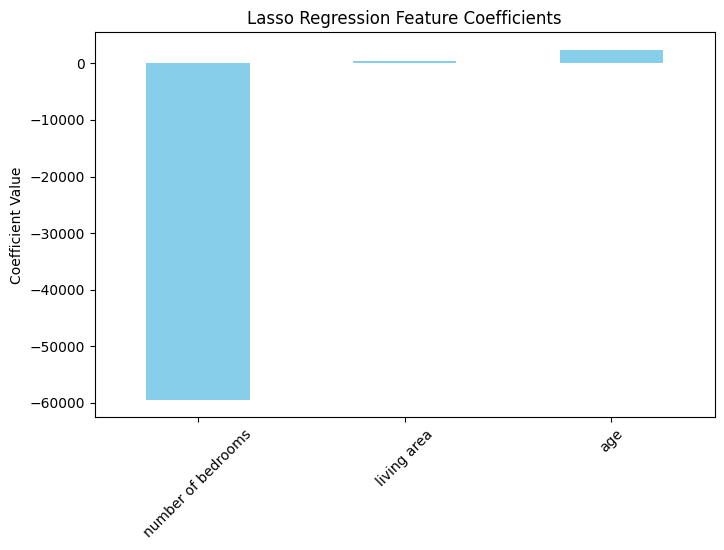

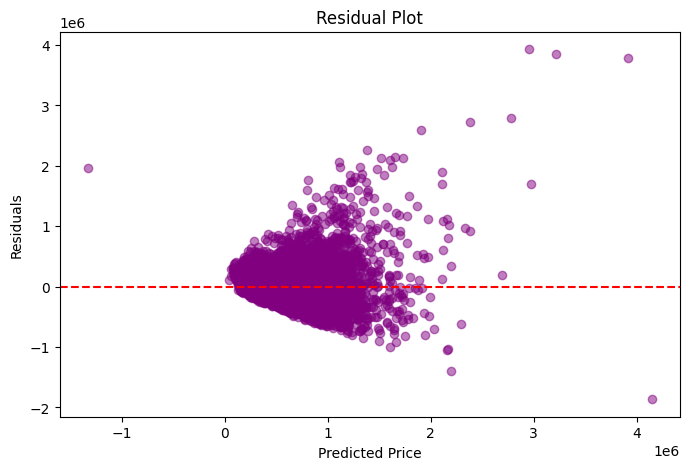


Root Mean Squared Error (RMSE): 245235.09


In [48]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# 1. Load dataset
data = pd.read_csv("House Price.csv")
print("Columns found in dataset:", data.columns.tolist())

# 2. Preprocess Data
# Fix: Calculate 'age' from 'Built Year'
current_year = datetime.now().year
data['age'] = current_year - data['Built Year']

# Fix: Use correct column names from the dataset
# 'number of bedrooms' instead of 'num_rooms'
# 'living area' instead of 'area'
# 'Price' instead of 'price'
feature_cols = ['number of bedrooms', 'living area', 'age']
target_col = 'Price'

# Define features and target
X = data[feature_cols]
y = data[target_col]

# 3. Fit Lasso Regression model
# alpha is the regularization strength
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)

# 4. Print and Plot Coefficients
coefficients = pd.Series(lasso.coef_, index=X.columns)
print("\nFeature Coefficients:\n", coefficients)

plt.figure(figsize=(8,5))
coefficients.plot(kind='bar', color='skyblue')
plt.title("Lasso Regression Feature Coefficients")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45)
plt.show()

# 5. Predict and Residual Plot
y_pred = lasso.predict(X)
residuals = y - y_pred

plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.5, color='purple')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# 6. Evaluate Model
# Calculate MSE first, then take the square root for RMSE
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
print(f"\nRoot Mean Squared Error (RMSE): {rmse:.2f}")

In [49]:
# 59. Consider a dataset Diabetes.csv with various medical attributes and a target column diabetes_progression. Write a Python code to fit a Ridge regression model using all available features to predict diabetes_progression. Use the complete dataset to train the model. Plot the coefficients of the features and create a residual plot.

Feature Coefficients:
 pregnant    0.020577
glucose     0.005922
bp         -0.002333
skin        0.000159
insulin    -0.000180
bmi         0.013249
pedigree    0.145394
age         0.002625
dtype: float64


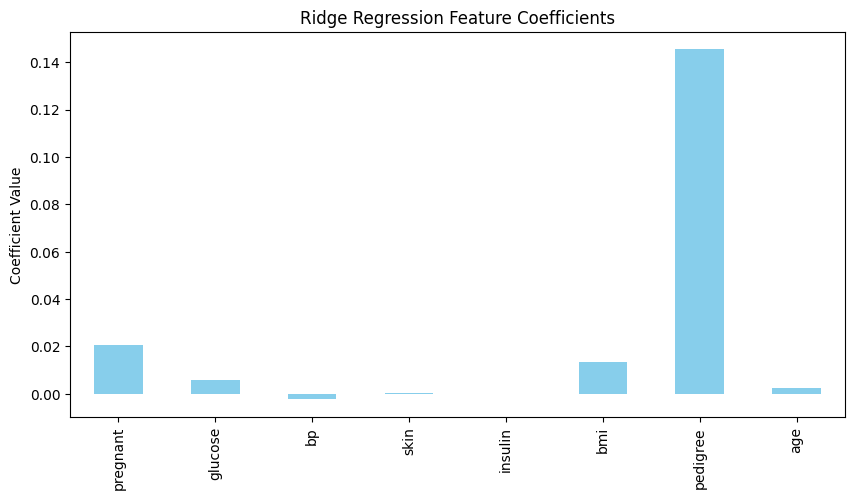

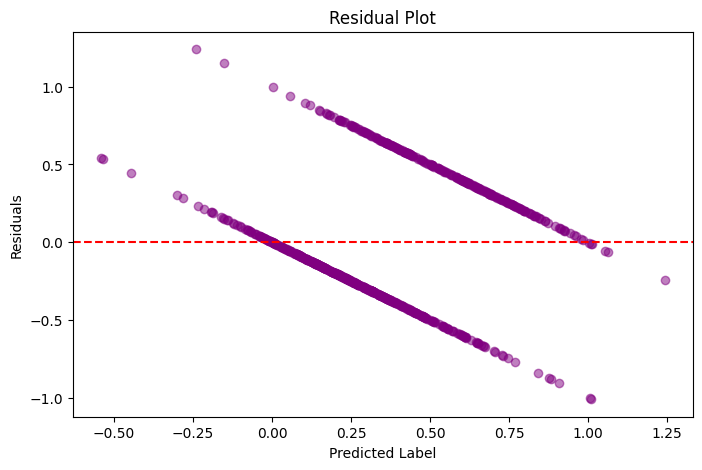

Root Mean Squared Error (RMSE): 0.3979


In [51]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Load dataset
data = pd.read_csv("diabetes.csv")

# Rename columns to match the dataset structure used in previous cells
# This ensures the target column 'label' is correctly identified.
data.columns = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# Separate features and target
# Fix: Use 'label' as the target variable since 'diabetes_progression' is missing.
X = data.drop(columns=['label'])
y = data['label']

# Fit Ridge Regression model
ridge = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge.fit(X, y)

# Feature coefficients
coefficients = pd.Series(ridge.coef_, index=X.columns)
print("Feature Coefficients:\n", coefficients)

# Plot feature coefficients
plt.figure(figsize=(10,5))
coefficients.plot(kind='bar', color='skyblue')
plt.title("Ridge Regression Feature Coefficients")
plt.ylabel("Coefficient Value")
plt.show()

# Predict on training data
y_pred = ridge.predict(X)

# Residuals
residuals = y - y_pred

# Residual plot
plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.5, color='purple')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Label")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Evaluate Model
# Calculate RMSE manually for compatibility with scikit-learn 1.4+
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

In [52]:
# 60. Consider a dataset WineQuality.csv with various chemical properties of wine and a target column quality. Write a Python code to fit a Lasso regression model using all available features to predict quality. Use the complete dataset to train the model. Plot the coefficients of the features and create a residual plot.

Feature Coefficients:
 fixed acidity          -0.000000
volatile acidity       -0.000000
citric acid             0.000000
residual sugar          0.009628
chlorides              -0.000000
free sulfur dioxide     0.007241
total sulfur dioxide   -0.001124
density                -0.000000
pH                     -0.000000
sulphates               0.000000
alcohol                 0.274237
type_white              0.000000
dtype: float64


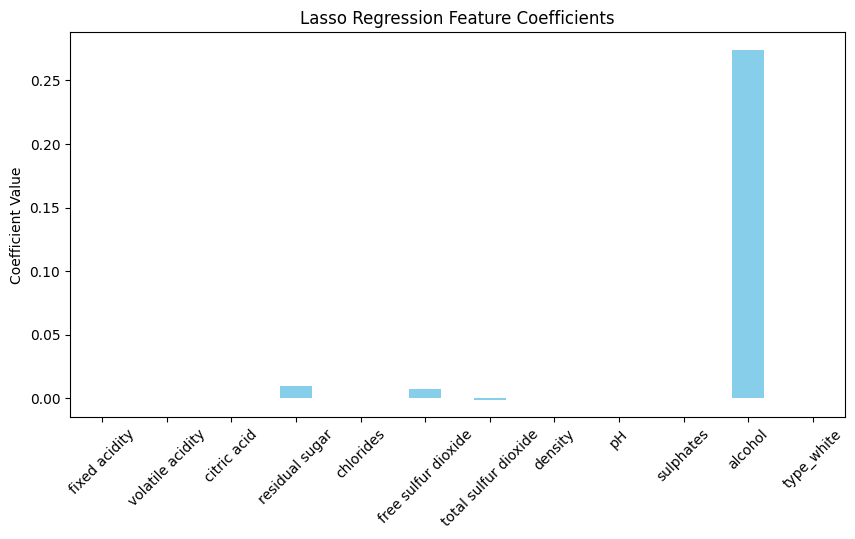

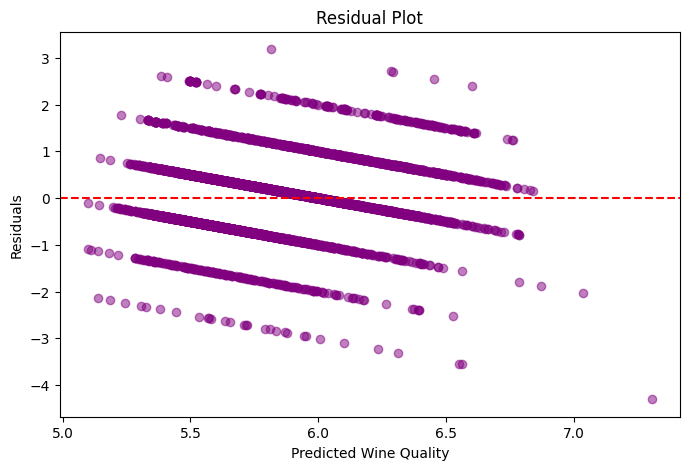

Root Mean Squared Error (RMSE): 0.77


In [56]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Load dataset
data = pd.read_csv("winequality.csv")

# Fix: Drop rows with missing values (NaN) which Lasso cannot handle natively
data = data.dropna()

# Separate features and target
X = data.drop(columns=['quality'])
y = data['quality']

# Handle categorical features (like 'type') by converting them to numerical format
X = pd.get_dummies(X, drop_first=True)

# Fit Lasso Regression model
lasso = Lasso(alpha=0.1)  # regularization strength
lasso.fit(X, y)

# Feature coefficients
coefficients = pd.Series(lasso.coef_, index=X.columns)
print("Feature Coefficients:\n", coefficients)

# Plot feature coefficients
plt.figure(figsize=(10,5))
coefficients.plot(kind='bar', color='skyblue')
plt.title("Lasso Regression Feature Coefficients")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45)
plt.show()

# Predict on training data
y_pred = lasso.predict(X)

# Residuals
residuals = y - y_pred

# Residual plot
plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.5, color='purple')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Wine Quality")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Evaluate Model
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

In [57]:
# 61. Consider a dataset HealthData.csv with features such as age, bmi, blood_pressure, and a target column health_score. Write a Python code to fit a Lasso regression model using all available features to predict health_score. Use the complete dataset to train the model. Plot the coefficients of the features and create a residual plot.

Feature Coefficients:
 age                              18.348891
gender_Male                     548.730018
gender_Other                   2165.564947
department_Dermatology         1238.243897
department_General Medicine    -897.291880
department_Neurology           2094.258069
department_Oncology            1590.340842
department_Orthopedics         2017.231138
department_Pediatrics           832.477262
diagnosis_Cancer               2146.377903
diagnosis_Diabetes               73.142941
diagnosis_Flu                  -538.407383
diagnosis_Fracture             -924.857167
diagnosis_Healthy             -1984.414998
diagnosis_Hypertension        -1159.909327
diagnosis_Migraine             -841.304325
treatment_Observation           228.441245
treatment_Surgery               962.086969
treatment_Therapy              1469.484990
treatment_Vaccination           284.766062
status_Discharged              -353.106027
status_Under Treatment         -498.404075
dtype: float64


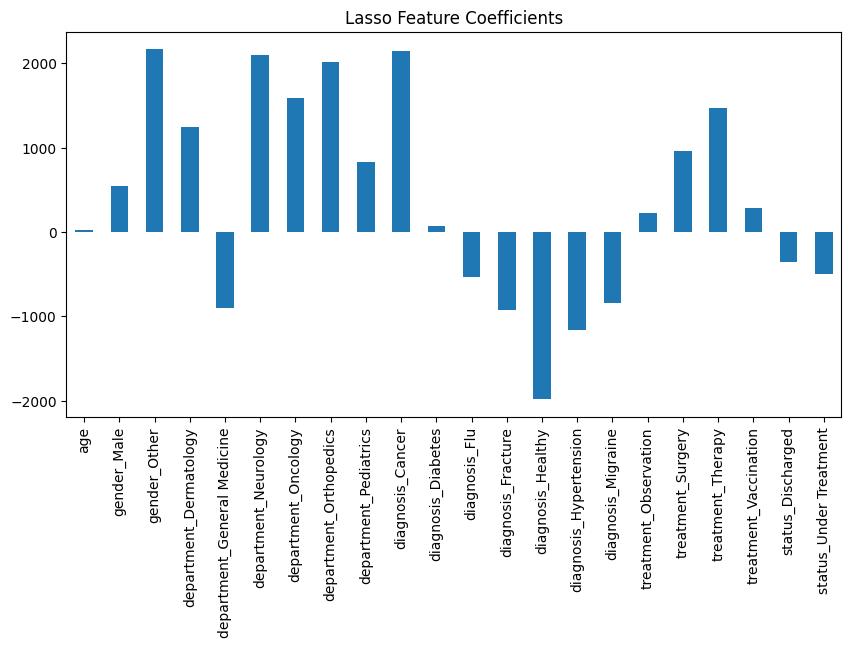

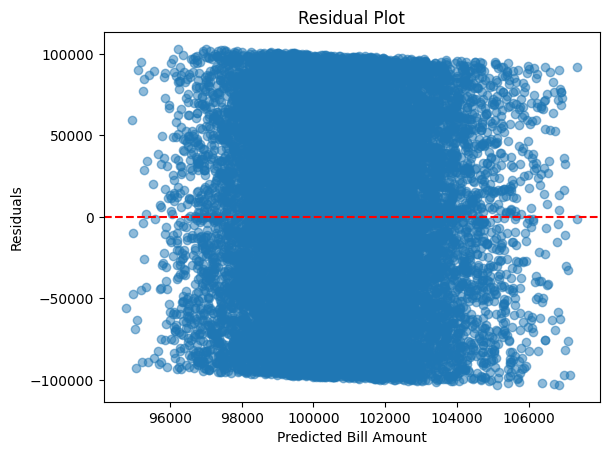

RMSE: 57585.02


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Load dataset
data = pd.read_csv("health data.csv")

# Features and target
# Based on the available columns, we use 'bill_amount' as a proxy target
# since 'health_score' was not found.
X = data[['age', 'gender', 'department', 'diagnosis', 'treatment', 'status']]
y = data['bill_amount']

# Convert categorical features to numbers
X = pd.get_dummies(X, drop_first=True)

# Fit Lasso regression
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)

# Coefficients
coefficients = pd.Series(lasso.coef_, index=X.columns)
print("Feature Coefficients:\n", coefficients)

# Plot coefficients
plt.figure(figsize=(10,5))
coefficients.plot(kind='bar', title="Lasso Feature Coefficients")
plt.show()

# Predictions and residuals
y_pred = lasso.predict(X)
residuals = y - y_pred

# Residual plot
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Bill Amount")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# RMSE calculation fix for scikit-learn 1.4+
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")

K-Means Clustering

In [64]:
# 11. You are working with an e-commerce company that wants to segment its customers based on their purchasing behaviour. Generate random dataset that includes features like total spending, frequency of purchases, and average basket size. Develop a Python program to perform K-means clustering. Visualize the clusters and summarize the characteristics of each segment.

Sample of generated dataset:
   Total_Spending  Purchase_Frequency  Avg_Basket_Size
0      599.342831           23.577874        18.111447
1      472.347140           25.607845        38.012500
2      629.537708           30.830512        50.104874
3      804.605971           30.538021        50.939612
4      453.169325            6.223306        40.998691


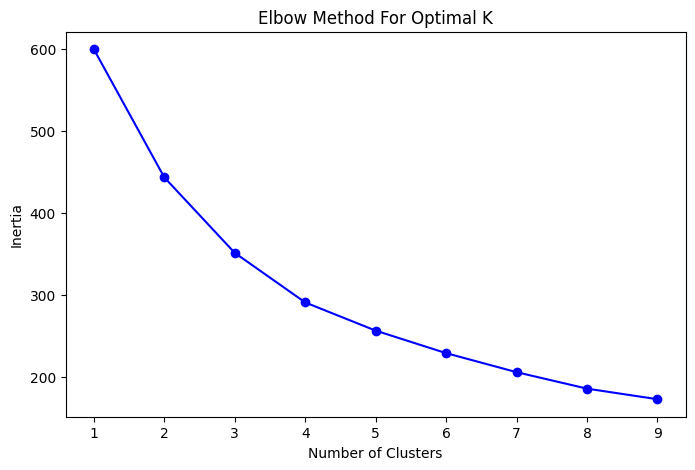

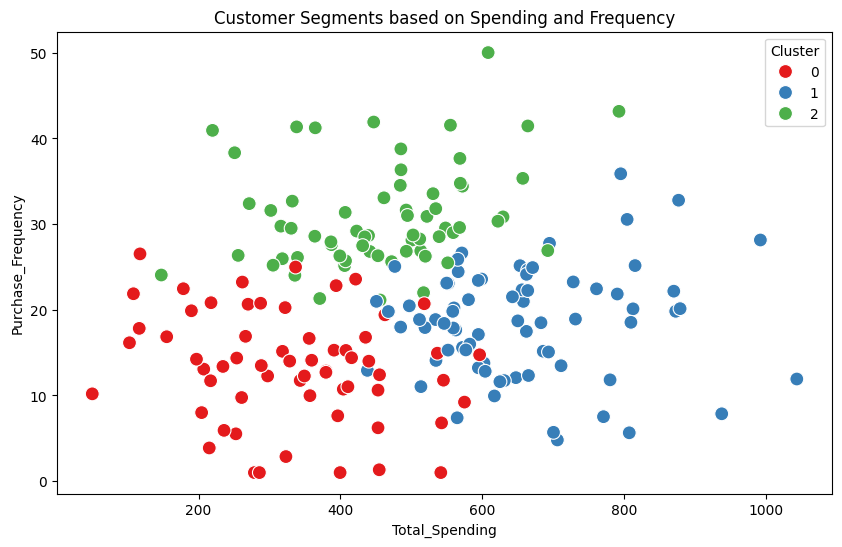

Cluster Summary:
        Total_Spending                          Purchase_Frequency             \
                  mean         min          max               mean        min   
Cluster                                                                         
0           331.555328   50.000000   596.494483          13.399876   1.000000   
1           656.475942  438.157525  1044.033833          18.569239   4.806300   
2           457.929069  147.391969   793.129754          30.870578  21.135173   

                   Avg_Basket_Size                        Count  
               max            mean        min         max count  
Cluster                                                          
0        26.513913       57.839119  15.932351  111.577616    62  
1        35.860168       40.346795   5.000000   79.598883    74  
2        50.000000       48.299422  14.825210   91.508016    64  


In [65]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Generate random dataset
np.random.seed(42)  # For reproducibility
num_customers = 200

data = pd.DataFrame({
    'Total_Spending': np.random.normal(500, 200, num_customers).clip(50, 1500),  # in $
    'Purchase_Frequency': np.random.normal(20, 10, num_customers).clip(1, 50),  # purchases per year
    'Avg_Basket_Size': np.random.normal(50, 20, num_customers).clip(5, 200)  # average $ per purchase
})

print("Sample of generated dataset:")
print(data.head())

# Step 2: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Step 3: Apply K-means clustering
# Determine optimal number of clusters using the elbow method
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

# From the plot, let's assume optimal clusters = 3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(data_scaled)

# Step 4: Add cluster labels to the dataset
data['Cluster'] = clusters

# Step 5: Visualize clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='Total_Spending', y='Purchase_Frequency', hue='Cluster', palette='Set1', data=data, s=100)
plt.title('Customer Segments based on Spending and Frequency')
plt.show()

# Step 6: Summarize characteristics of each cluster
summary = data.groupby('Cluster').agg({
    'Total_Spending': ['mean', 'min', 'max'],
    'Purchase_Frequency': ['mean', 'min', 'max'],
    'Avg_Basket_Size': ['mean', 'min', 'max'],
    'Cluster': 'count'
}).rename(columns={'Cluster': 'Count'})

print("Cluster Summary:")
print(summary)


In [66]:
# 12. Use make_blobs to generate 300 samples. Analyse the data and apply KMeans clustering and generate the graph for better representation. Show what happens if you change n_clusters count from 2 to 7(2,3,4,5,6,7)?

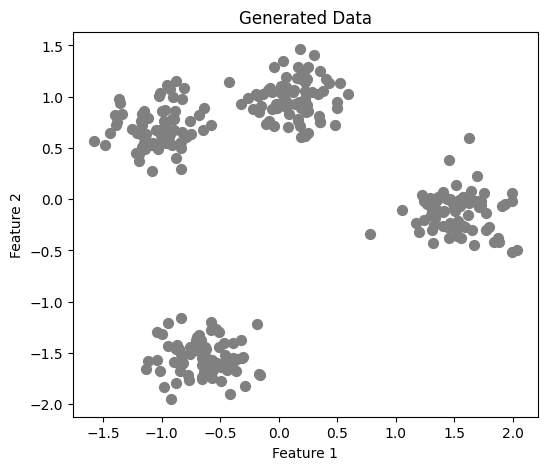

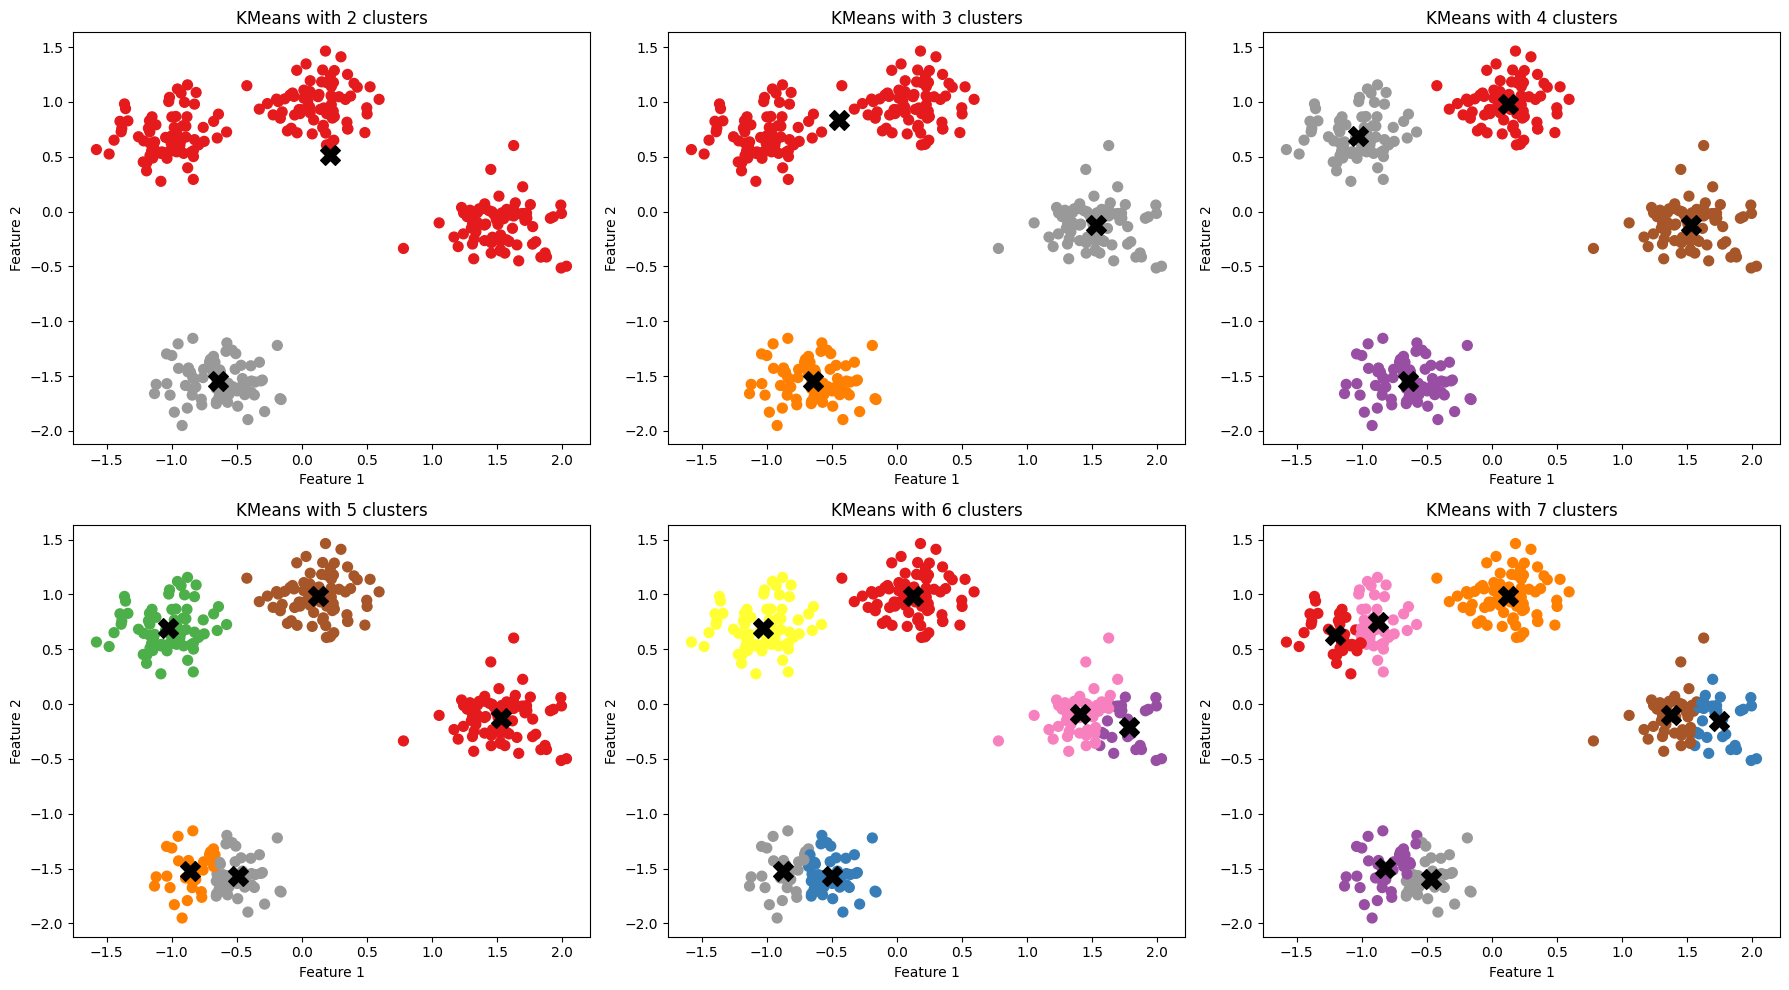

Cluster counts for n_clusters from 2 to 7:
2 clusters: {np.int32(0): np.int64(225), np.int32(1): np.int64(75)}
3 clusters: {np.int32(0): np.int64(150), np.int32(1): np.int64(75), np.int32(2): np.int64(75)}
4 clusters: {np.int32(0): np.int64(76), np.int32(1): np.int64(75), np.int32(2): np.int64(75), np.int32(3): np.int64(74)}
5 clusters: {np.int32(0): np.int64(75), np.int32(1): np.int64(74), np.int32(2): np.int64(31), np.int32(3): np.int64(76), np.int32(4): np.int64(44)}
6 clusters: {np.int32(0): np.int64(76), np.int32(1): np.int64(46), np.int32(2): np.int64(24), np.int32(3): np.int64(74), np.int32(4): np.int64(51), np.int32(5): np.int64(29)}
7 clusters: {np.int32(0): np.int64(35), np.int32(1): np.int64(31), np.int32(2): np.int64(37), np.int32(3): np.int64(76), np.int32(4): np.int64(44), np.int32(5): np.int64(39), np.int32(6): np.int64(38)}


In [67]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Generate synthetic data with make_blobs
np.random.seed(42)
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=1.2, n_features=2, random_state=42)

# Step 2: Standardize the data for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Visualize the raw data
plt.figure(figsize=(6,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c='grey', s=50)
plt.title("Generated Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Step 4: Apply KMeans clustering for n_clusters = 2 to 7
fig, axes = plt.subplots(2, 3, figsize=(18,10))
axes = axes.flatten()

for i, k in enumerate(range(2, 8)):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_scaled)

    axes[i].scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap='Set1', s=50)
    axes[i].scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', s=200, marker='X')
    axes[i].set_title(f'KMeans with {k} clusters')
    axes[i].set_xlabel("Feature 1")
    axes[i].set_ylabel("Feature 2")

plt.tight_layout()
plt.show()

# Step 5: Summary of cluster counts
print("Cluster counts for n_clusters from 2 to 7:")
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_scaled)
    unique, counts = np.unique(clusters, return_counts=True)
    print(f"{k} clusters: {dict(zip(unique, counts))}")


In [68]:
# 14. A grocery store wants to analyze customer purchase patterns to improve product placements. Generate random transaction data (products purchased together), apply K-means clustering to group similar transactions.

Sample of generated transactions:
   Milk  Bread  Eggs  Cheese  Butter  Apples  Bananas  Cereal  Juice  Tomatoes
0     0      1     0       0       0       1        0       0      0         1
1     0      0     0       0       1       0        1       1      1         0
2     1      0     1       1       1       1        1       1      1         1
3     0      0     1       1       1       0        1       0      0         0
4     0      0     1       1       1       1        1       0      1         1


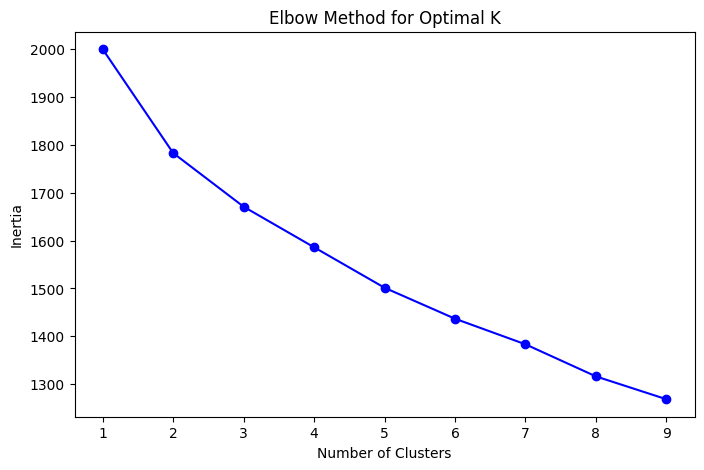


Average products purchased per cluster:
             Milk     Bread      Eggs    Cheese    Butter    Apples   Bananas  \
Cluster                                                                         
0        0.492537  0.462687  0.656716  0.059701  0.373134  0.313433  0.328358   
1        0.500000  0.928571  0.385714  0.771429  0.485714  0.714286  0.428571   
2        0.365079  0.031746  0.317460  0.682540  0.666667  0.555556  0.777778   

           Cereal     Juice  Tomatoes  
Cluster                                
0        0.298507  0.402985  0.597015  
1        0.814286  0.514286  0.428571  
2        0.380952  0.634921  0.333333  


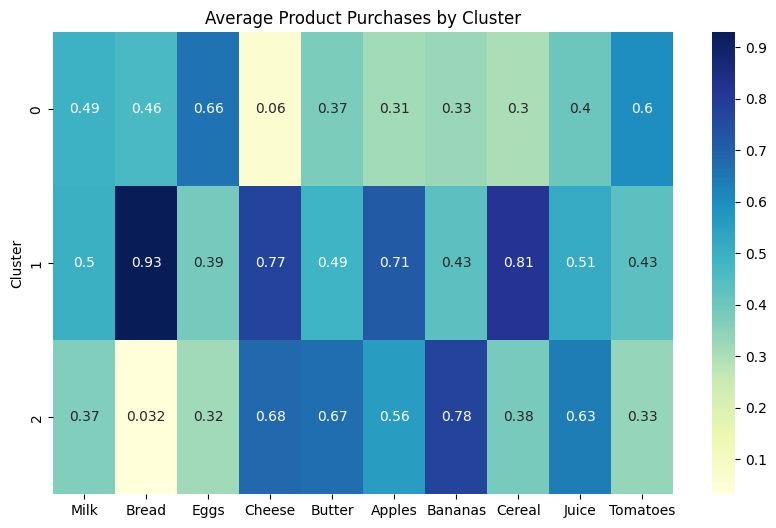

In [69]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

# Step 1: Generate random transaction data
np.random.seed(42)

# List of 10 products in the store
products = ['Milk', 'Bread', 'Eggs', 'Cheese', 'Butter', 'Apples', 'Bananas', 'Cereal', 'Juice', 'Tomatoes']

num_transactions = 200

# Simulate transactions: 1 if product bought, 0 if not
transactions = np.random.randint(0, 2, size=(num_transactions, len(products)))

# Create DataFrame
df_transactions = pd.DataFrame(transactions, columns=products)
print("Sample of generated transactions:")
print(df_transactions.head())

# Step 2: Standardize data (important for KMeans)
scaler = StandardScaler()
transactions_scaled = scaler.fit_transform(df_transactions)

# Step 3: Determine optimal clusters using the Elbow Method
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(transactions_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Step 4: Apply KMeans with chosen number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(transactions_scaled)

# Add cluster labels to transactions
df_transactions['Cluster'] = clusters

# Step 5: Analyze clusters
cluster_summary = df_transactions.groupby('Cluster').mean()
print("\nAverage products purchased per cluster:")
print(cluster_summary)

# Step 6: Visualize clusters using a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(cluster_summary, annot=True, cmap='YlGnBu')
plt.title('Average Product Purchases by Cluster')
plt.show()

In [70]:
# 14. Generate random dataset with 35 points. Apply KMeans clustering and generate the plot with each cluster points with different colours. What is the impact of varying cluster count? Justify your understanding with suitable graphs.

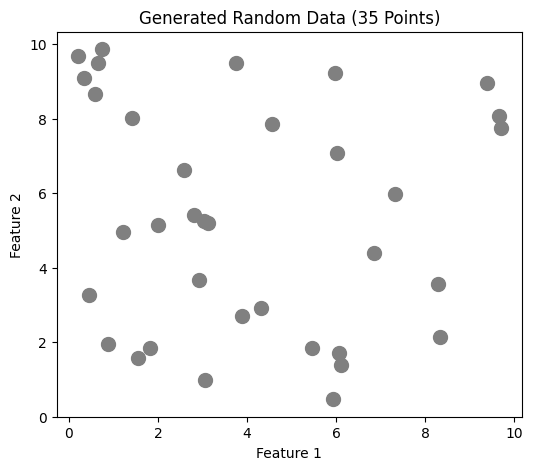

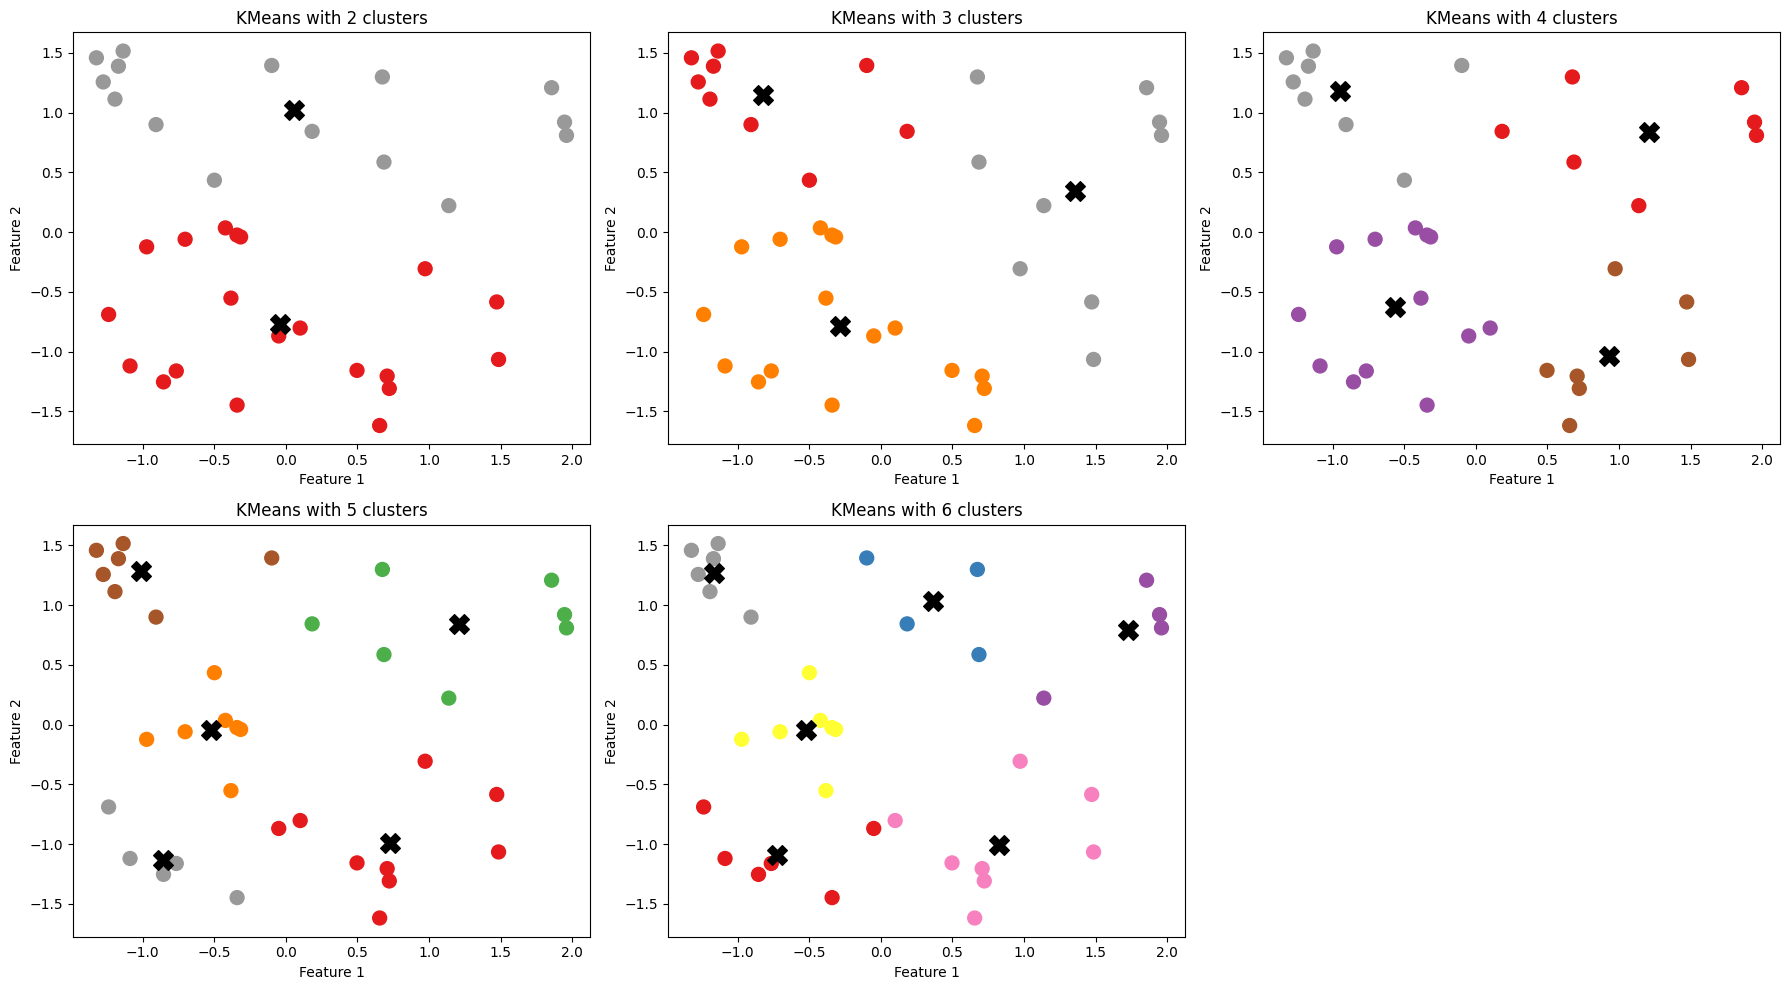

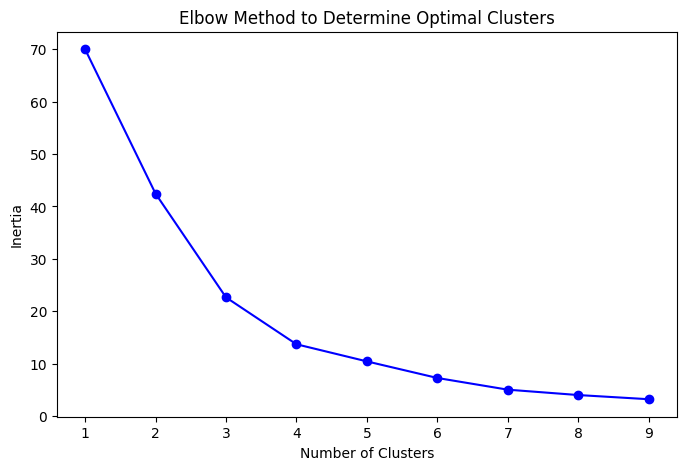

In [71]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Generate random dataset with 35 points (2D for visualization)
np.random.seed(42)
X = np.random.rand(35, 2) * 10  # 35 points in 2D space (0-10 range)

# Visualize the raw data
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c='grey', s=100)
plt.title("Generated Random Data (35 Points)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply KMeans clustering for varying cluster counts
cluster_counts = [2, 3, 4, 5, 6]  # Varying number of clusters
fig, axes = plt.subplots(2, 3, figsize=(18,10))
axes = axes.flatten()

for i, k in enumerate(cluster_counts):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_scaled)

    axes[i].scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap='Set1', s=100)
    axes[i].scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', s=200, marker='X')
    axes[i].set_title(f'KMeans with {k} clusters')
    axes[i].set_xlabel("Feature 1")
    axes[i].set_ylabel("Feature 2")

# Remove empty subplot (since we have 5 plots in a 2x3 grid)
axes[-1].axis('off')

plt.tight_layout()
plt.show()

# Step 4: Elbow Method to justify cluster choice
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,10), inertia, 'bo-')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method to Determine Optimal Clusters")
plt.show()

K-Medoids Clustering

In [72]:
# 9. Generate a random dataset of urban areas with features such as population density, average income, and amenities, (min. 100 data). Apply K-medoids clustering to identify neighbourhoods with similar characteristics. Visualize the clusters on a map.

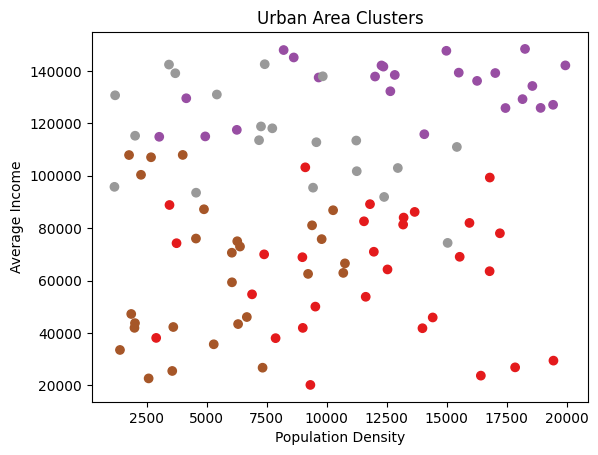

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt

# 1. Create random dataset
np.random.seed(42)
n = 100
data = pd.DataFrame({
    'PopulationDensity': np.random.randint(1000, 20000, n),
    'AverageIncome': np.random.randint(20000, 150000, n),
    'AmenitiesScore': np.random.randint(1, 10, n)
})

# 2. Scale features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 3. Apply K-medoids
kmedoids = KMedoids(n_clusters=4, random_state=42)
data['Cluster'] = kmedoids.fit_predict(data_scaled)

# 4. Simple 2D visualization
plt.scatter(data['PopulationDensity'], data['AverageIncome'], c=data['Cluster'], cmap='Set1')
plt.xlabel('Population Density')
plt.ylabel('Average Income')
plt.title('Urban Area Clusters')
plt.show()


In [2]:
# 10. Generate a random dataset containing customer information (e.g., age, spending score)(100 rows), apply K-medoids clustering to segment customers into distinct groups. Visualize the clusters and summarize the characteristics of each segment

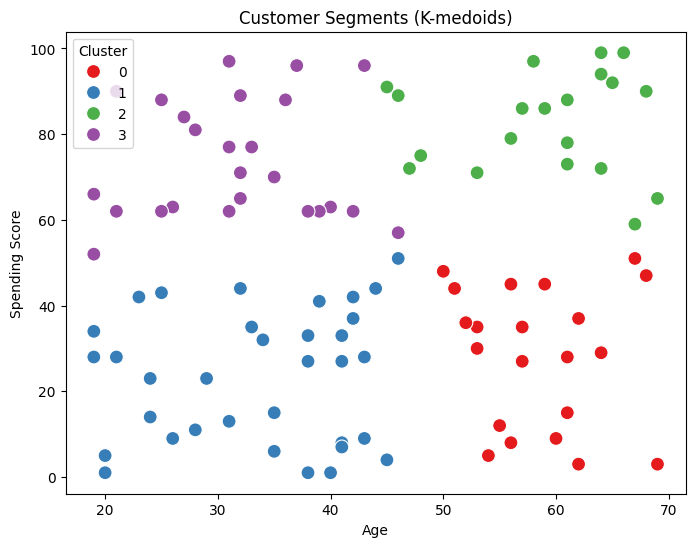

Customer Segment Summary:
           Age  SpendingScore  Count
Cluster                             
0        58.43          28.19     21
1        33.53          23.50     34
2        58.95          82.75     20
3        31.56          73.68     25


In [3]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Generate random customer dataset
np.random.seed(42)
n_customers = 100

data = pd.DataFrame({
    'CustomerID': [f'C{i+1}' for i in range(n_customers)],
    'Age': np.random.randint(18, 70, n_customers),
    'SpendingScore': np.random.randint(1, 100, n_customers)
})

# Step 3: Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(data[['Age', 'SpendingScore']])

# Step 4: Apply K-medoids clustering
k = 4  # number of segments
kmedoids = KMedoids(n_clusters=k, random_state=42)
data['Cluster'] = kmedoids.fit_predict(features_scaled)

# Step 5: Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Age', y='SpendingScore', hue='Cluster',
    data=data, palette='Set1', s=100
)
plt.title('Customer Segments (K-medoids)')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

# Step 6: Summarize characteristics of each segment
summary = data.groupby('Cluster')[['Age','SpendingScore']].mean().round(2)
summary['Count'] = data.groupby('Cluster').size()
print("Customer Segment Summary:")
print(summary)


DBSCAN

In [4]:
# 15. Develop a Python program to implement DBSCAN using the sklearn library. Use a 2D dataset (ex. make_moons) for clustering.

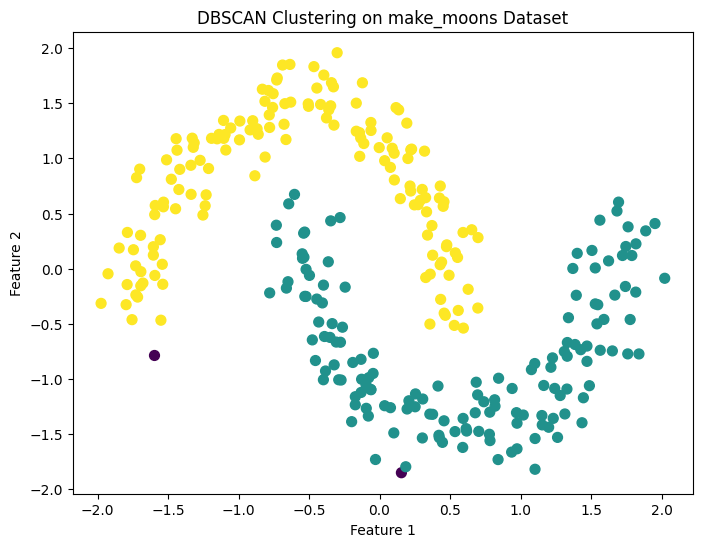

Cluster labels for each point:
[ 0  0  0  1  0  0  0  1  1  0  0  1  0  1  0  0  0  0  1  0  1  1  0  0
  1  1  0  0  0  0  1  0  1  1  0  1  1  1  1  1  1  1  0  1  1  1  0  0
  1  0  0  1  0  1  0  0  1  1  0  1  0  1  1  0  0  1  1  0  1  0  1  1
  0  0  1  0  1  1  1  0  0  0  1  1  1  1  1  1  1  1  0  1  1  0  1  1
  0 -1  0  1  0  1  1  0  0  0  1  1  0  1  1  0  1  0  0  1  1  0  0  0
  1  0  0  0  1  0  1  1  0  0  1  1  0  1  0  0  0  0  0  1  1  1  0  1
 -1  0  1  1  1  1  0  1  0  0  0  0  0  1  0  1  0  0  1  1  1  1  0  0
  0  1  1  0  0  1  1  0  1  1  0  1  0  1  0  0  1  0  0  0  1  1  1  0
  0  0  0  1  0  0  1  0  1  1  1  0  0  0  0  1  1  1  1  0  1  1  0  1
  1  0  0  1  1  0  0  0  1  0  1  1  0  0  1  0  0  0  0  1  1  1  0  0
  0  0  0  1  0  1  0  0  0  1  1  1  1  1  1  1  1  1  0  1  1  1  0  1
  1  0  0  1  0  0  1  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  1  1
  0  1  1  0  1  0  1  0  1  1  0  1]


In [5]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Step 1: Generate 2D dataset
X, y = make_moons(n_samples=300, noise=0.1, random_state=42)

# Step 2: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)  # eps = max distance between neighbors
clusters = dbscan.fit_predict(X_scaled)

# Step 4: Visualize the clusters
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap='viridis', s=50)
plt.title("DBSCAN Clustering on make_moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Optional: Print cluster labels
print("Cluster labels for each point:")
print(clusters)


In [6]:
# 16. Generate a random dataset with 5 columns and use 3rd and 4th column as data to implement DBSCAN. Consider eps=5 and minPts=5.

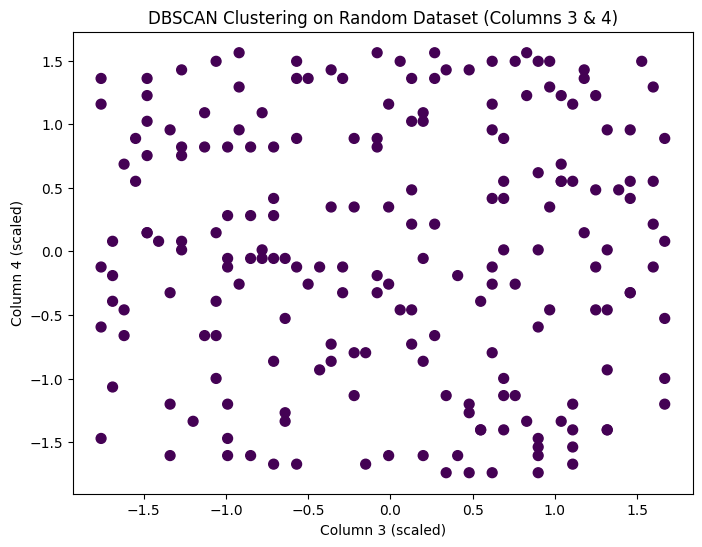

Cluster labels for each point:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [7]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Step 1: Generate random dataset with 5 columns and 200 rows
np.random.seed(42)
data = np.random.randint(0, 50, size=(200, 5))  # random integers between 0 and 50

# Step 2: Select 3rd and 4th columns (index 2 and 3)
X = data[:, 2:4]

# Step 3: Scale the data (important for distance-based clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply DBSCAN
dbscan = DBSCAN(eps=5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Step 5: Visualize the clusters
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("DBSCAN Clustering on Random Dataset (Columns 3 & 4)")
plt.xlabel("Column 3 (scaled)")
plt.ylabel("Column 4 (scaled)")
plt.show()

# Optional: Print cluster labels
print("Cluster labels for each point:")
print(clusters)


In [8]:
# 17. Use DBSCAN to cluster customers based on their purchasing behaviour (ex. frequency of purchases, average transaction amount)(Generate random dataset with min. 100 customers). Develop a program that analyses the clusters to identify different customer segments for targeted marketing

Sample Customer Data:
   CustomerID  PurchaseFrequency  AvgTransactionAmount
0           1                  7                   181
1           2                 15                   161
2           3                 11                   472
3           4                  8                   324
4           5                  7                   383

Cluster Summary:
        PurchaseFrequency         AvgTransactionAmount          Count
                     mean min max                 mean min  max count
Cluster                                                              
-1              14.000000  10  18           245.500000  18  473     2
 0               9.290541   1  19           264.121622  11  498   148


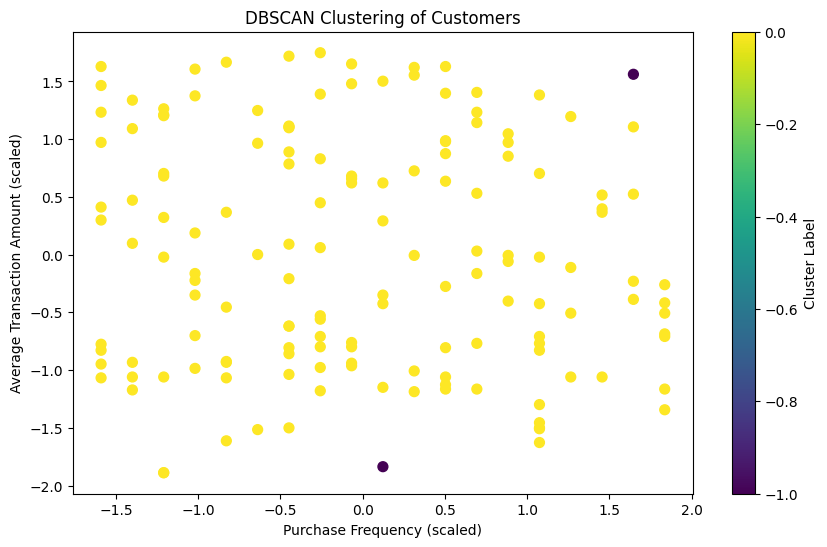

In [9]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Step 1: Generate random dataset for 100 customers
np.random.seed(42)
num_customers = 150

# Features: purchase frequency (per month), average transaction amount ($)
purchase_frequency = np.random.randint(1, 20, size=num_customers)        # 1 to 20 purchases per month
avg_transaction_amount = np.random.randint(10, 500, size=num_customers)   # $10 to $500 per transaction

# Combine into a DataFrame
customers = pd.DataFrame({
    'CustomerID': range(1, num_customers+1),
    'PurchaseFrequency': purchase_frequency,
    'AvgTransactionAmount': avg_transaction_amount
})

print("Sample Customer Data:")
print(customers.head())

# Step 2: Scale the features for DBSCAN
X = customers[['PurchaseFrequency', 'AvgTransactionAmount']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # eps may need tuning based on scaled data
clusters = dbscan.fit_predict(X_scaled)

# Add cluster labels to the dataframe
customers['Cluster'] = clusters

# Step 4: Analyze the clusters
cluster_summary = customers.groupby('Cluster').agg({
    'PurchaseFrequency': ['mean', 'min', 'max'],
    'AvgTransactionAmount': ['mean', 'min', 'max'],
    'CustomerID': 'count'
}).rename(columns={'CustomerID':'Count'})

print("\nCluster Summary:")
print(cluster_summary)

# Step 5: Visualize the clusters
plt.figure(figsize=(10,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap='viridis', s=50)
plt.title("DBSCAN Clustering of Customers")
plt.xlabel("Purchase Frequency (scaled)")
plt.ylabel("Average Transaction Amount (scaled)")
plt.colorbar(label='Cluster Label')
plt.show()


In [10]:
# 18. Generate a data frame containing two features(Spending,features) for 100 data. Apply DBSCAN and do parametric analysis for eps value and show the impact on the performance of model via graph.

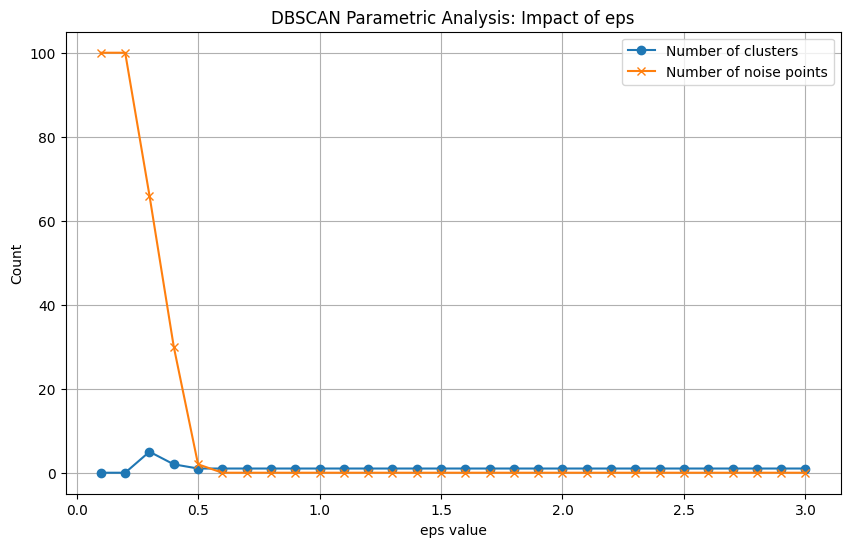

In [11]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Step 1: Generate random dataset for 100 data points
np.random.seed(42)
num_points = 100

spending = np.random.randint(50, 500, size=num_points)   # Spending in $
features = np.random.randint(1, 20, size=num_points)     # Some feature count

# Create DataFrame
data = pd.DataFrame({
    'Spending': spending,
    'Features': features
})

# Step 2: Scale the features
X = data.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Perform parametric analysis on eps
eps_values = np.arange(0.1, 3.1, 0.1)  # Try eps from 0.1 to 3
num_clusters = []
num_noise = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    clusters = dbscan.fit_predict(X_scaled)

    # Count number of clusters (excluding noise -1)
    n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
    n_noise = list(clusters).count(-1)

    num_clusters.append(n_clusters)
    num_noise.append(n_noise)

# Step 4: Plot the impact of eps on clustering
plt.figure(figsize=(10,6))
plt.plot(eps_values, num_clusters, marker='o', label='Number of clusters')
plt.plot(eps_values, num_noise, marker='x', label='Number of noise points')
plt.title("DBSCAN Parametric Analysis: Impact of eps")
plt.xlabel("eps value")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.show()


In [12]:
# 19. Generate a random dataset with 4 columns and use 1st and 3rd column as data to implement DBSCAN. What if eps is changed from 1 to 5? How it will affect the performance of the model? What is the impact of minPts on the performance of the model? Justify it with graph by changing minPts.

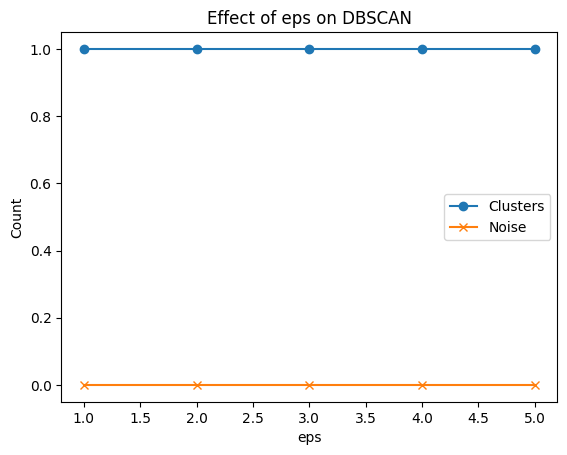

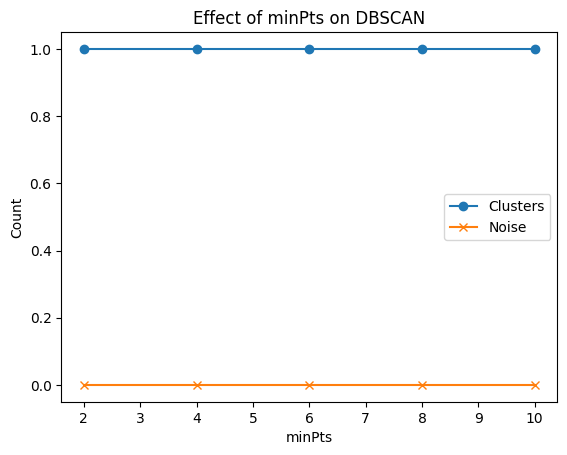

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# 1. Generate random dataset (4 columns, 100 rows)
np.random.seed(42)
data = np.random.randint(0, 50, size=(100, 4))

# Use 1st and 3rd column
X = data[:, [0, 2]]

# Scale the data
X_scaled = StandardScaler().fit_transform(X)

# Function to get clusters and noise
def get_dbscan_stats(eps, minPts):
    db = DBSCAN(eps=eps, min_samples=minPts)
    labels = db.fit_predict(X_scaled)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    return n_clusters, n_noise

# 2. Effect of eps (minPts=5)
eps_values = [1, 2, 3, 4, 5]
clusters_eps = []
noise_eps = []
for eps in eps_values:
    c, n = get_dbscan_stats(eps, 5)
    clusters_eps.append(c)
    noise_eps.append(n)

plt.plot(eps_values, clusters_eps, marker='o', label='Clusters')
plt.plot(eps_values, noise_eps, marker='x', label='Noise')
plt.title("Effect of eps on DBSCAN")
plt.xlabel("eps")
plt.ylabel("Count")
plt.legend()
plt.show()

# 3. Effect of minPts (eps=2)
minPts_values = [2, 4, 6, 8, 10]
clusters_minPts = []
noise_minPts = []
for m in minPts_values:
    c, n = get_dbscan_stats(2, m)
    clusters_minPts.append(c)
    noise_minPts.append(n)

plt.plot(minPts_values, clusters_minPts, marker='o', label='Clusters')
plt.plot(minPts_values, noise_minPts, marker='x', label='Noise')
plt.title("Effect of minPts on DBSCAN")
plt.xlabel("minPts")
plt.ylabel("Count")
plt.legend()
plt.show()


In [14]:
# 20. Generate random dataset for mall_customer dataset with features like Customer, Genre, Age, Annual Imcome, Spending Score. Consider minimum 200 random samples for analysis. Apply DBSCAN as well as agglomerative clustering and generate the dendrogram. Plot points in each cluster for DBSCAN with different colours.

Sample of Dataset:
   CustomerID  Genre  Age  AnnualIncome  SpendingScore
0           1      1   49         91213             39
1           2      0   56         45746             53
2           3      1   66         64377             42
3           4      1   69         69045             58
4           5      1   49        112888             39


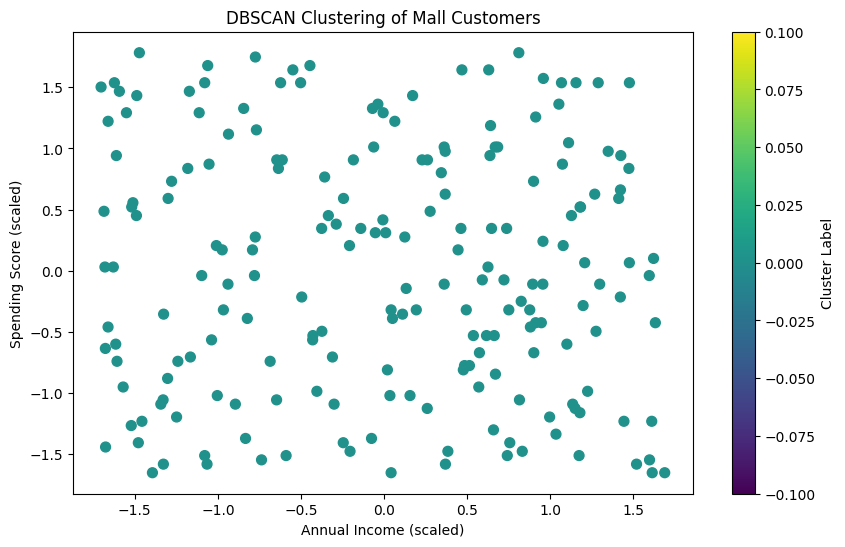

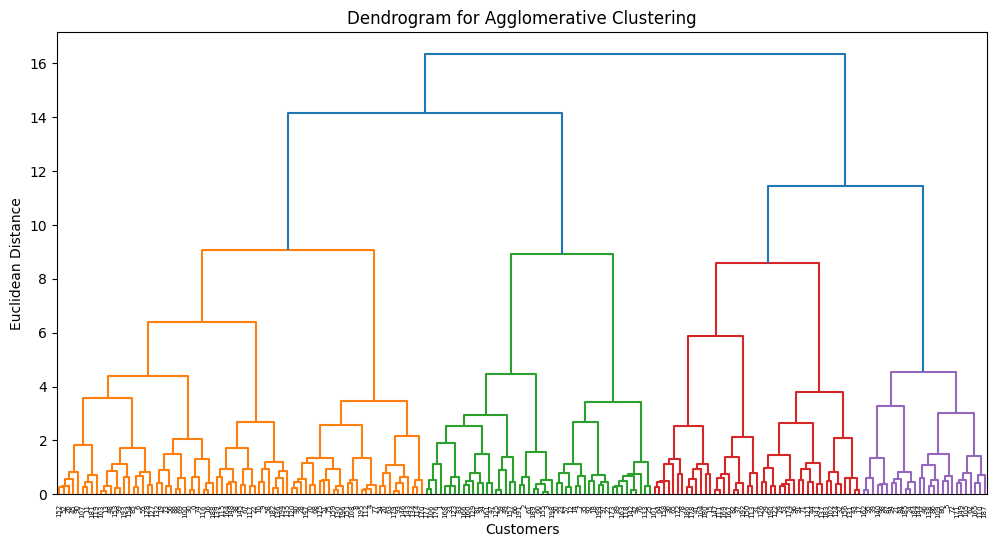


Cluster counts (DBSCAN vs Agglomerative):
   DBSCAN_Cluster  Agglo_Cluster
0           200.0             49
1             NaN             45
2             NaN             50
3             NaN             27
4             NaN             29


In [15]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 1: Generate random Mall Customer dataset
np.random.seed(42)
num_customers = 200

# Random data
customer_id = np.arange(1, num_customers + 1)
genre = np.random.choice(['Male', 'Female'], size=num_customers)
age = np.random.randint(18, 70, size=num_customers)
annual_income = np.random.randint(15000, 150000, size=num_customers)
spending_score = np.random.randint(1, 100, size=num_customers)

# Create DataFrame
mall_customers = pd.DataFrame({
    'CustomerID': customer_id,
    'Genre': genre,
    'Age': age,
    'AnnualIncome': annual_income,
    'SpendingScore': spending_score
})

# Encode 'Genre' as numeric
le = LabelEncoder()
mall_customers['Genre'] = le.fit_transform(mall_customers['Genre'])

print("Sample of Dataset:")
print(mall_customers.head())

# Step 2: Select features for clustering
X = mall_customers[['Age', 'AnnualIncome', 'SpendingScore']].values

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)
mall_customers['DBSCAN_Cluster'] = db_labels

# Step 4: Plot DBSCAN clusters
plt.figure(figsize=(10,6))
plt.scatter(X_scaled[:,1], X_scaled[:,2], c=db_labels, cmap='viridis', s=50)
plt.title("DBSCAN Clustering of Mall Customers")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.colorbar(label='Cluster Label')
plt.show()

# Step 5: Agglomerative Clustering & Dendrogram
plt.figure(figsize=(12,6))
linked = linkage(X_scaled, method='ward')
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

# Optional: Agglomerative clustering for comparison
agglo = AgglomerativeClustering(n_clusters=5)
agglo_labels = agglo.fit_predict(X_scaled)
mall_customers['Agglo_Cluster'] = agglo_labels
print("\nCluster counts (DBSCAN vs Agglomerative):")
print(mall_customers[['DBSCAN_Cluster', 'Agglo_Cluster']].apply(pd.Series.value_counts))


Hierarchical/Agglomerative Clustering

In [16]:
# 20. Generate random dataset for mall_customer dataset with features like Customer, Genre, Age, Annual Imcome, Spending Score. Consider minimum 200 random samples for analysis. Apply DBSCAN as well as agglomerative clustering and generate the dendrogram. Plot points in each cluster for DBSCAN with different colours.

Initial Data:
     Customer   Genre  Age  Annual Income  Spending Score
0  Customer_1    Male   49          91213              39
1  Customer_2  Female   56          45746              53
2  Customer_3    Male   66          64377              42
3  Customer_4    Male   69          69045              58
4  Customer_5    Male   49         112888              39


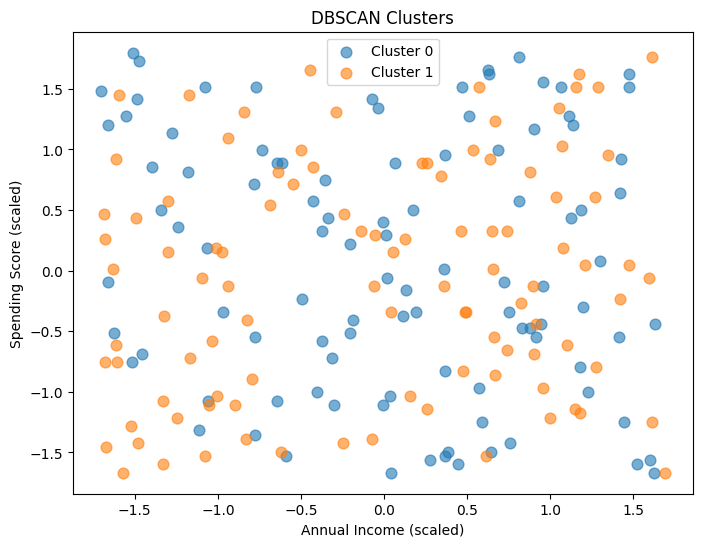

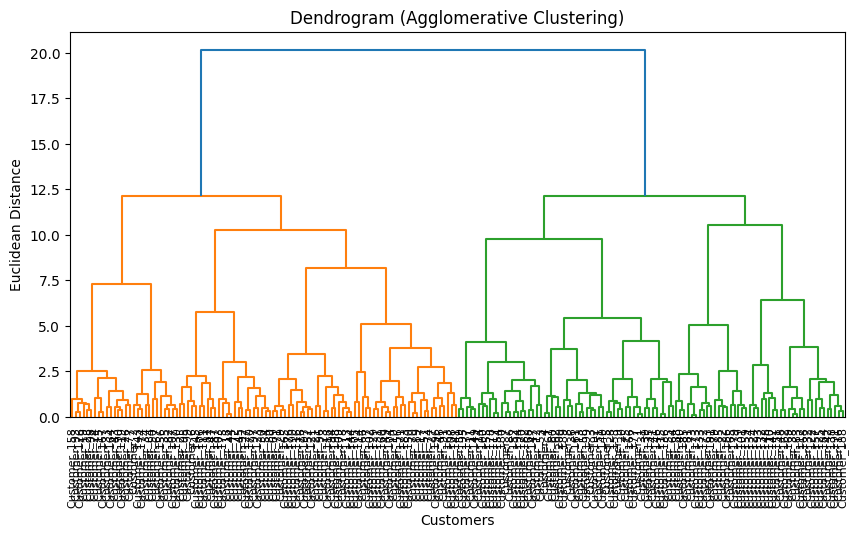

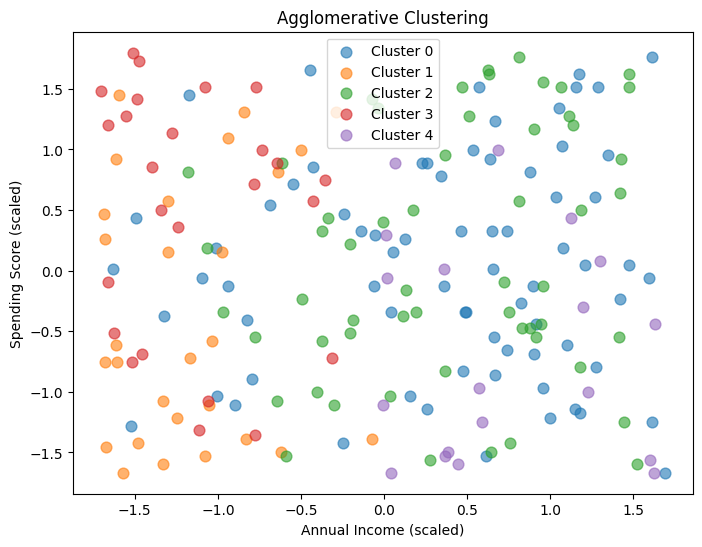

In [18]:
# Step 0: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 1: Generate random dataset
np.random.seed(42)
n_samples = 200

# Features
customers = [f'Customer_{i+1}' for i in range(n_samples)]
genres = np.random.choice(['Male', 'Female'], size=n_samples)
ages = np.random.randint(18, 70, size=n_samples)
annual_income = np.random.randint(15000, 150000, size=n_samples)
spending_score = np.random.randint(1, 101, size=n_samples)

# Create DataFrame
mall_df = pd.DataFrame({
    'Customer': customers,
    'Genre': genres,
    'Age': ages,
    'Annual Income': annual_income,
    'Spending Score': spending_score
})

print("Initial Data:")
print(mall_df.head())

# Step 2: Preprocess for clustering
# Encode 'Genre'
le = LabelEncoder()
mall_df['Genre'] = le.fit_transform(mall_df['Genre'])

# Features for clustering
X = mall_df[['Genre', 'Age', 'Annual Income', 'Spending Score']].values

# Standardize features (important for DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)
mall_df['DBSCAN_Cluster'] = db_labels

# Step 4: Visualize DBSCAN clusters
plt.figure(figsize=(8,6))
unique_labels = np.unique(db_labels)
# Use matplotlib.colormaps directly to avoid deprecation warning
colors = plt.get_cmap('tab10')

for i, label in enumerate(unique_labels):
    plt.scatter(
        X_scaled[db_labels==label, 2],  # Annual Income
        X_scaled[db_labels==label, 3],  # Spending Score
        label=f'Cluster {label}' if label != -1 else 'Noise',
        alpha=0.6,
        s=60,
        color=colors(i % 10)
    )

plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('DBSCAN Clusters')
plt.legend()
plt.show()

# Step 5: Agglomerative Clustering & Dendrogram
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linked,
           labels=mall_df['Customer'].values,
           leaf_rotation=90,
           leaf_font_size=8)
plt.title('Dendrogram (Agglomerative Clustering)')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

# Step 6: Agglomerative Clustering (cut at 5 clusters for example)
# Fix: change 'affinity' to 'metric' for compatibility with sklearn 1.4+
agglo = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
agglo_labels = agglo.fit_predict(X_scaled)
mall_df['Agglo_Cluster'] = agglo_labels

# Step 7: Visualize Agglomerative Clusters
plt.figure(figsize=(8,6))
for cluster_id in np.unique(agglo_labels):
    plt.scatter(
        X_scaled[agglo_labels==cluster_id, 2],  # Annual Income
        X_scaled[agglo_labels==cluster_id, 3],  # Spending Score
        label=f'Cluster {cluster_id}',
        alpha=0.6,
        s=60
    )

plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Agglomerative Clustering')
plt.legend()
plt.show()

PCA (Dimensionality Reduction)

In [19]:
# 27. Write a Python program to apply Principal Component Analysis (PCA) on the Iris dataset and reduce its dimensionality to 2 dimensions. You should use sklearn's PCA implementation. After reducing the dimensions, visualize the transformed data in a 2D scatter plot, coloring the points based on their respective classes.
# Dataset Description:
# • The Iris dataset consists of 150 samples with 4 features.
# • The target variable is categorical with three classes (Setosa, Versicolor, Virginica).
# Instructions:
# • Import the necessary libraries.
# • Load the Iris dataset from sklearn.datasets.
# • Separate the features and the target variable.
# • Standardize the features (mean = 0, variance = 1).
# • Apply PCA to reduce the dimensionality of the dataset to 2 dimensions.
# Visualize the transformed data in a 2D scatter plot, using different colors for each class.

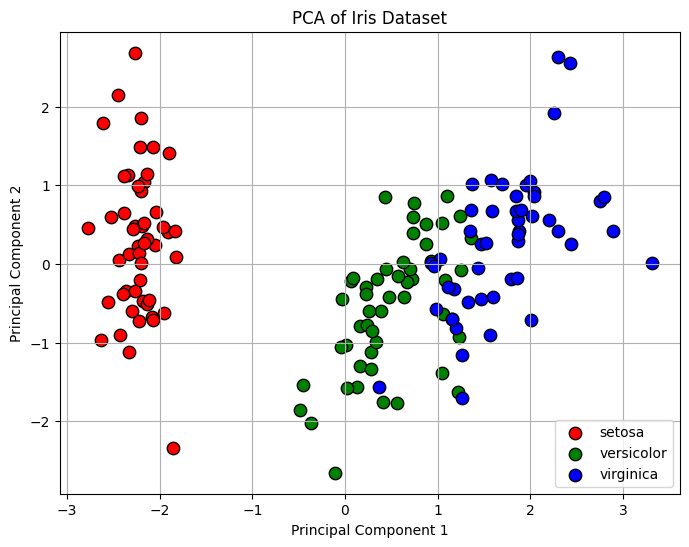

In [20]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data         # Features
y = iris.target       # Target labels
target_names = iris.target_names

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA to reduce dimensionality to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Visualize the transformed data in a 2D scatter plot
plt.figure(figsize=(8,6))
colors = ['red', 'green', 'blue']

for i, target_name in enumerate(target_names):
    plt.scatter(
        X_pca[y == i, 0], X_pca[y == i, 1],
        label=target_name,
        color=colors[i],
        edgecolor='k',
        s=80
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
# 33. Create a synthetic dataset using make_blobs with the following specifications:
# • The dataset should have 4 features and 4 centers (clusters).
# • Initialize the PCA object with n_components=3 to reduce the dataset to 3 dimensions.
# • Use Matplotlib to plot the original 4D dataset in a 3D scatter plot and the PCA-reduced 3D dataset in another 3D scatter plot side by side.
# Instructions:
# • Import the necessary libraries (numpy, matplotlib, and sklearn).
# • Generate the synthetic dataset using make_blobs.
# • Apply PCA to reduce the dataset to 3 dimensions.
# • Create a figure with two subplots:
# • The first subplot should display the original 3D representation of the dataset (you can use any three of the four features for this plot).
# • The second subplot should display the PCA-reduced 3D dataset.
# • Ensure that the points in both plots are color-coded based on their respective cluster labels.
# Add appropriate titles and labels to the plots for clarity.

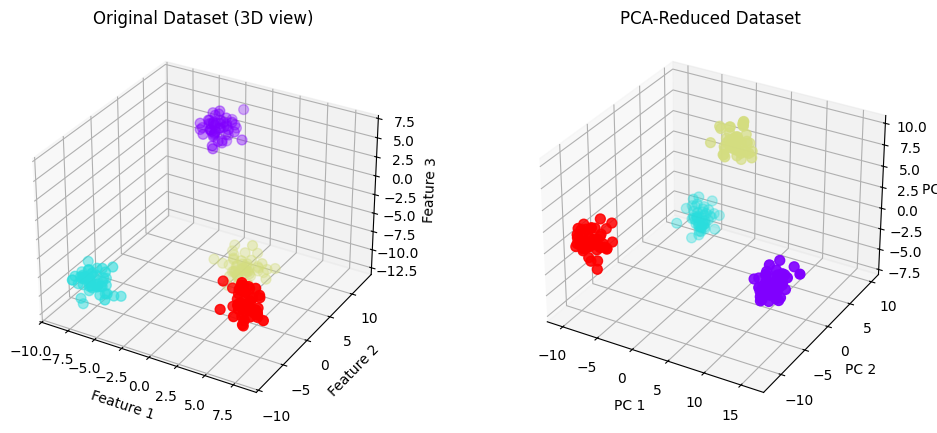

In [23]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

# Generate synthetic 4D dataset with 4 clusters
X, y = make_blobs(n_samples=200, n_features=4, centers=4, random_state=42)

# Apply PCA to reduce to 3D
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Create 3D plots
fig = plt.figure(figsize=(12, 5))

# Original dataset (plot first 3 features)
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='rainbow', s=50)
ax1.set_title('Original Dataset (3D view)')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_zlabel('Feature 3')

# PCA-reduced dataset
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='rainbow', s=50)
ax2.set_title('PCA-Reduced Dataset')
ax2.set_xlabel('PC 1')
ax2.set_ylabel('PC 2')
ax2.set_zlabel('PC 3')

plt.show()


In [24]:
# 38. Dataset: You will use the Iris dataset, which consists of 150 samples of iris flowers, each described by 4 features (sepal length, sepal width, petal length, and petal width). The target variable indicates the species of the iris flower (Setosa, Versicolor, or Virginica). apply both Linear Discriminant Analysis (LDA) and Principal Component Analysis (PCA) to the Iris dataset. You will reduce the dimensionality of the dataset using both techniques and visualize the results in 2D scatter plots. You will then compare the effectiveness of LDA and PCA in terms of class separability.

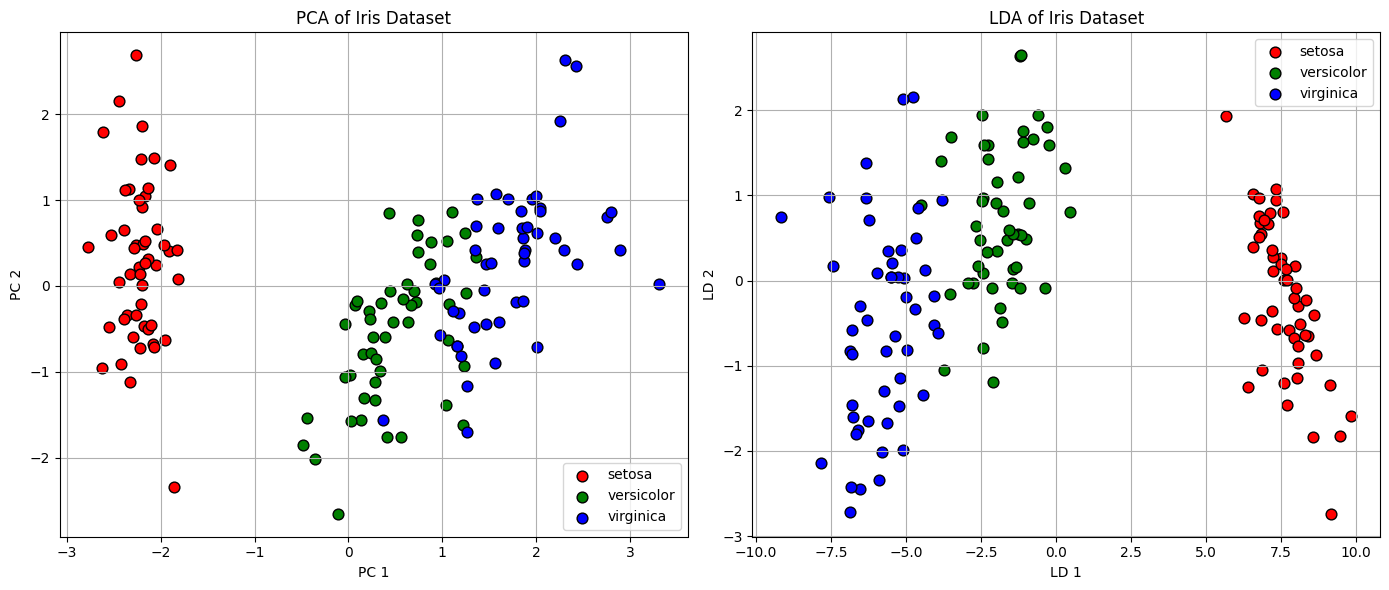

In [25]:
# Import libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Load Iris dataset
iris = load_iris()
X = iris.data      # Features
y = iris.target    # Target labels
target_names = iris.target_names

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- PCA: Reduce to 2 dimensions ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# --- LDA: Reduce to 2 dimensions ---
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

# --- Plotting ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

colors = ['red', 'green', 'blue']

# PCA plot
for i, target_name in enumerate(target_names):
    axes[0].scatter(X_pca[y == i, 0], X_pca[y == i, 1],
                    color=colors[i], label=target_name, s=60, edgecolor='k')
axes[0].set_title('PCA of Iris Dataset')
axes[0].set_xlabel('PC 1')
axes[0].set_ylabel('PC 2')
axes[0].legend()
axes[0].grid(True)

# LDA plot
for i, target_name in enumerate(target_names):
    axes[1].scatter(X_lda[y == i, 0], X_lda[y == i, 1],
                    color=colors[i], label=target_name, s=60, edgecolor='k')
axes[1].set_title('LDA of Iris Dataset')
axes[1].set_xlabel('LD 1')
axes[1].set_ylabel('LD 2')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


In [27]:
# 40. apply Principal Component Analysis (PCA) to a house price prediction dataset to reduce its dimensionality and then use a regression model to predict house prices. You will evaluate the model's performance using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²).

In [31]:
# Import libraries
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset (California Housing is the standard replacement for Boston)
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Standardize features
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA (reduce to 5 components)
X_pca = PCA(n_components=5).fit_transform(X_scaled)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("MAE:", round(mean_absolute_error(y_test, y_pred), 2))
print("MSE:", round(mean_squared_error(y_test, y_pred), 2))
print("R&sup2;:", round(r2_score(y_test, y_pred), 2))

MAE: 0.65
MSE: 0.74
R&sup2;: 0.44


In [32]:
# 62. Write a python snippet to demonstrate use of PCA on 100 samples with 3 features generated randomly.

In [33]:
import numpy as np
from sklearn.decomposition import PCA

# Generate random data: 100 samples, 3 features
np.random.seed(42)
X = np.random.rand(100, 3)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("Original shape:", X.shape)
print("Transformed shape:", X_pca.shape)
print("PCA components:\n", pca.components_)
print("Explained variance ratio:", pca.explained_variance_ratio_)


Original shape: (100, 3)
Transformed shape: (100, 2)
PCA components:
 [[ 0.36310609  0.89784554 -0.24905291]
 [-0.54821599  0.42200161  0.72206224]]
Explained variance ratio: [0.37743432 0.33646087]


In [34]:
# 63. Write a python snippet to demonstrate use of PCA on dataset of your choice. Also print explained variance of all principle components.

In [35]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the features
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA (keep all components)
pca = PCA(n_components=X.shape[1])
X_pca = pca.fit_transform(X_scaled)

# Print explained variance ratio
explained_variance = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(X.shape[1])],
    'Explained Variance Ratio': pca.explained_variance_ratio_
})
print(explained_variance)


    PC  Explained Variance Ratio
0  PC1                  0.729624
1  PC2                  0.228508
2  PC3                  0.036689
3  PC4                  0.005179


In [36]:
# 64. Create synthetic Dataset using make_blobs with 3 features and 3 centers initialize the PCA object with n_components=2 to reduce the dataset to 2 dimensions. use matplotlib to plot the original 3D dataset and the PCA-reduced 2D dataset side by side.

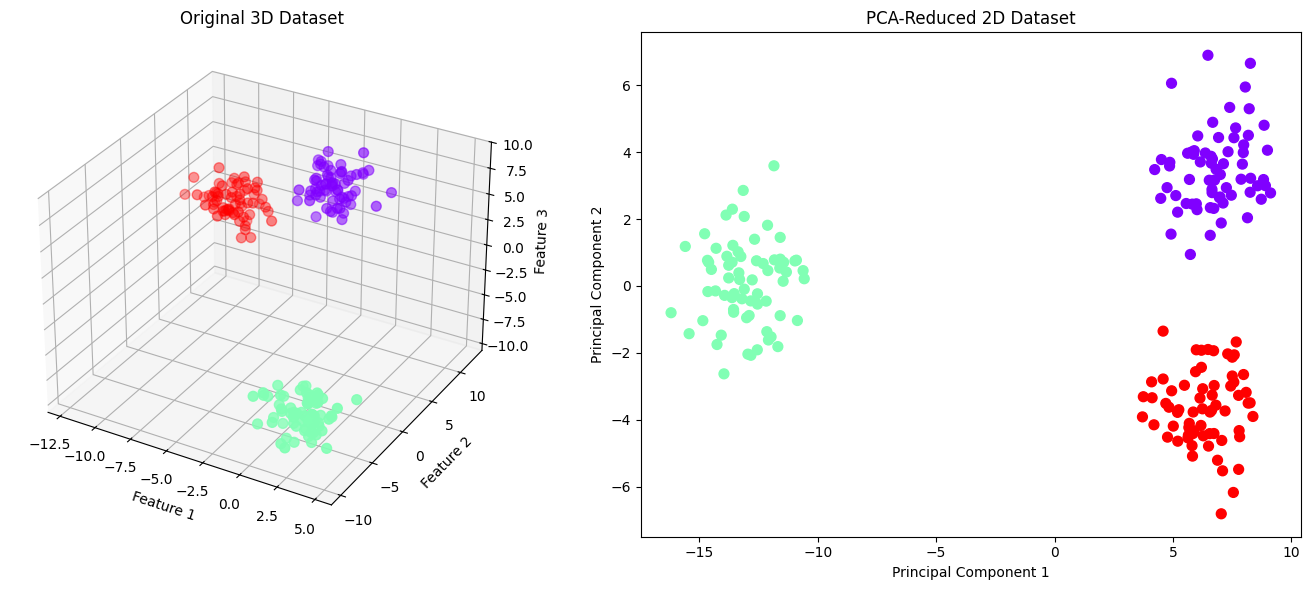

In [37]:
# Import libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

# Step 1: Create synthetic dataset
X, y = make_blobs(n_samples=200, n_features=3, centers=3, cluster_std=1.2, random_state=42)

# Step 2: Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 3: Plot original 3D dataset and PCA-reduced 2D dataset side by side
fig = plt.figure(figsize=(14, 6))

# Original 3D dataset
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='rainbow', s=50)
ax1.set_title('Original 3D Dataset')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_zlabel('Feature 3')

# PCA-reduced 2D dataset
ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='rainbow', s=50)
ax2.set_title('PCA-Reduced 2D Dataset')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


In [38]:
# 65. Use load_iris from sklearn.datasets to load the Iris dataset. initialize the PCA object with n_components=2 to reduce the dataset to 2. use matplotlib to plot the PCA-reduced dataset in 2D.

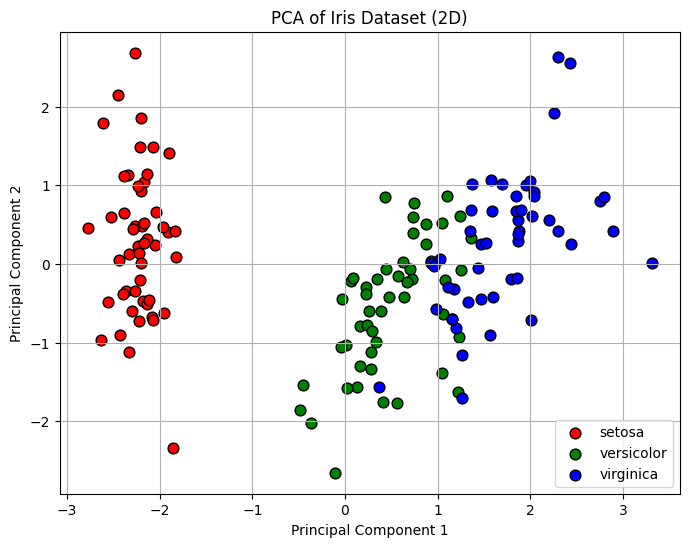

In [39]:
# Import libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Standardize features
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot PCA-reduced dataset in 2D
plt.figure(figsize=(8,6))
colors = ['red', 'green', 'blue']

for i, target_name in enumerate(target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
                color=colors[i], label=target_name, s=60, edgecolor='k')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset (2D)')
plt.legend()
plt.grid(True)
plt.show()


LDA (Dimensionality Reduction)

In [40]:
# 34. Apply Linear Discriminant Analysis (LDA) to the Iris dataset to reduce its dimensionality from 4 to 2 dimensions. You will visualize the LDA-reduced dataset in a 2D scatter plot using Matplotlib.
# instructions:
# Load the Iris dataset
# Briefly explore the dataset to understand its structure. Print the shape of the dataset and the first few rows to get an overview of the features and target variable.
# Initialize the PCA object to reduce the dataset to 2 dimensions.
# Fit the LDA model to the Iris dataset and transform the dataset
# Use Matplotlib to create a scatter plot of the LDA-reduced dataset.
# Color the points based on their respective species (Setosa, Versicolor, Virginica) to visualize how well the LDA has separated the different classes.
# Add appropriate titles and labels to the axes of the plot.
# Include a legend to indicate which colors correspond to which species.

Shape of feature matrix: (150, 4)
Shape of target vector: (150,)

First 5 rows of features:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

First 5 target labels: [0 0 0 0 0]


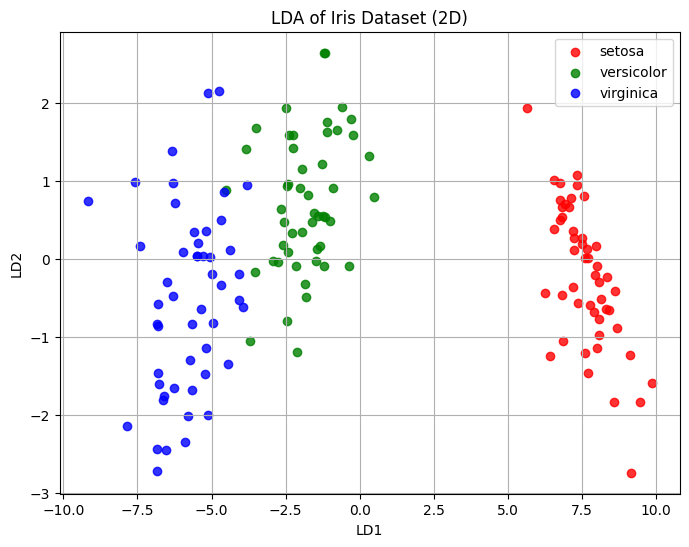

In [41]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data       # Features: 4 dimensions
y = iris.target     # Target: 3 classes
target_names = iris.target_names

# Step 2: Explore the dataset
print("Shape of feature matrix:", X.shape)
print("Shape of target vector:", y.shape)
print("\nFirst 5 rows of features:\n", X[:5])
print("\nFirst 5 target labels:", y[:5])

# Step 3: Initialize and fit the LDA model to reduce to 2 dimensions
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Step 4: Visualize the LDA-reduced dataset
colors = ['red', 'green', 'blue']
plt.figure(figsize=(8,6))

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name)

plt.title('LDA of Iris Dataset (2D)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.grid(True)
plt.show()


In [42]:
# 35. Apply Linear Discriminant Analysis (LDA) to the Wine dataset to reduce its dimensionality and classify the types of wine based on their chemical properties. You will visualize the LDA-reduced dataset in a 2D scatter plot and evaluate the classification performance.
# Dataset: You will use the Wine dataset, which consists of 178 samples of wine, each described by 13 features representing different chemical properties. The target variable indicates the type of wine, which can take on one of three classes (1, 2, or 3).

Feature matrix shape: (178, 13)
Target vector shape: (178,)

First 5 rows of features:
 [[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]

First 5 target labels: [0 0 0 0 0]

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       1.00      1.00      1.00        

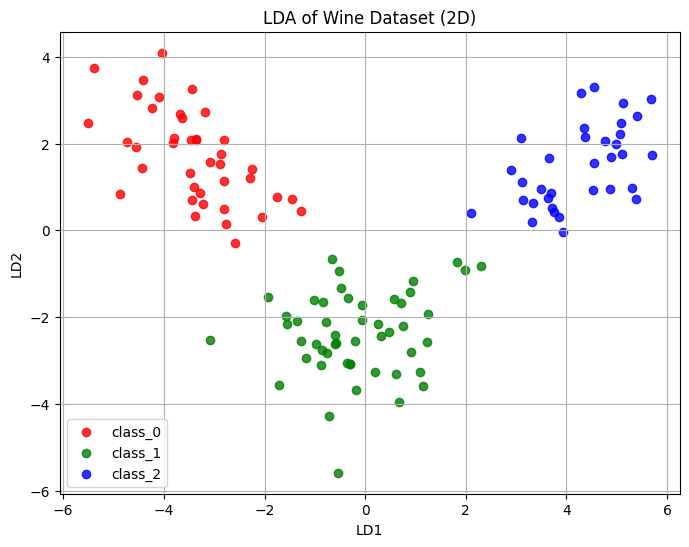

In [43]:
# Import libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load the Wine dataset
wine = load_wine()
X = wine.data        # 13 features
y = wine.target      # 3 classes (0, 1, 2)
target_names = wine.target_names

# Step 2: Explore the dataset
print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)
print("\nFirst 5 rows of features:\n", X[:5])
print("\nFirst 5 target labels:", y[:5])

# Step 3: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Apply LDA (for dimensionality reduction and classification)
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit(X_train, y_train).transform(X_train)
X_test_lda = lda.transform(X_test)

# Step 5: Train LDA classifier on training data
y_pred = lda.predict(X_test)

# Step 6: Evaluate classification performance
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

# Step 7: Visualize LDA-reduced dataset (2D)
colors = ['red', 'green', 'blue']
plt.figure(figsize=(8,6))
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_train_lda[y_train == i, 0], X_train_lda[y_train == i, 1], alpha=0.8, color=color, label=target_name)

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA of Wine Dataset (2D)')
plt.legend()
plt.grid(True)
plt.show()


In [45]:
# 36. apply Linear Discriminant Analysis (LDA) to the Iris dataset using the Scikit-learn library. You will preprocess the data using label encoding, perform LDA to reduce the dimensionality of the dataset, and visualize the results in a 2D scatter plot.

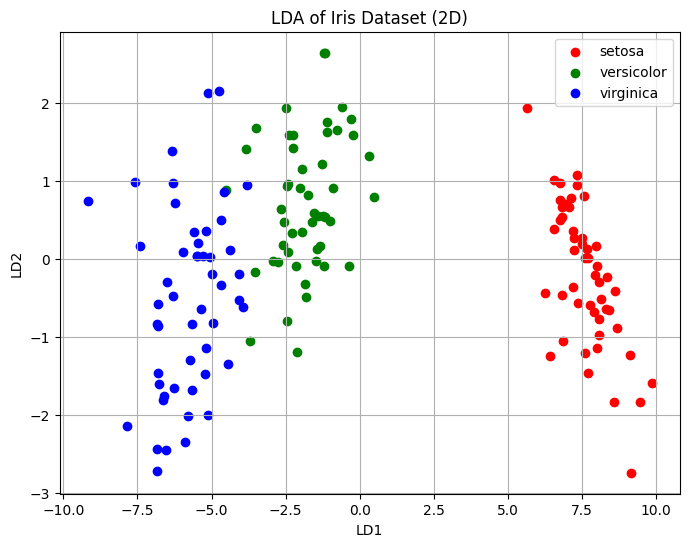

In [46]:
# Import required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data       # Features (4 dimensions)
y = iris.target     # Target labels (already numeric, but we will encode to demonstrate label encoding)

# Step 2: Encode target labels (optional here since Iris target is already numeric)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 3: Apply LDA to reduce to 2 dimensions
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit(X, y_encoded).transform(X)

# Step 4: Visualize the LDA-reduced dataset
colors = ['red', 'green', 'blue']
target_names = iris.target_names

plt.figure(figsize=(8,6))
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_lda[y_encoded == i, 0], X_lda[y_encoded == i, 1], color=color, label=target_name)

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA of Iris Dataset (2D)')
plt.legend()
plt.grid(True)
plt.show()


In [47]:
# 37. Objective: The goal of this practical exam is to apply Linear Discriminant Analysis (LDA) to the Breast Cancer dataset using the Scikit-learn library. You will reduce the dimensionality of the dataset from multiple features to 1 dimension and visualize the results using Matplotlib.
# • load the Breast Cancer dataset
# • initialize the LDA to reduce the dataset to 1 dimension.
# • Fit the LDA model to the Breast Cancer dataset and transform the dataset to obtain the LDA-reduced representation.
# Visualization

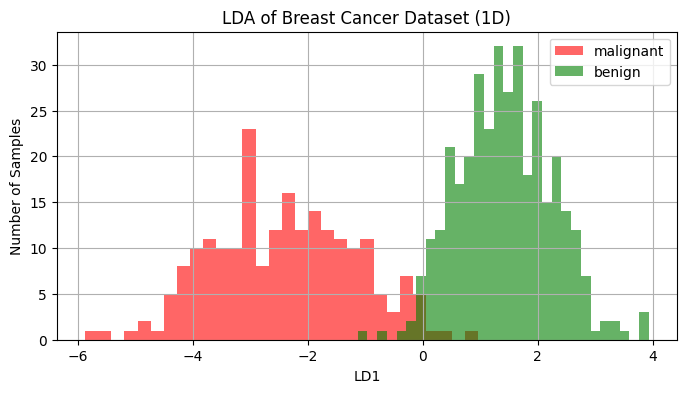

In [48]:
# Import required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Step 1: Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data       # Features
y = cancer.target     # Target labels (0 = malignant, 1 = benign)
target_names = cancer.target_names

# Step 2: Initialize LDA to reduce to 1 dimension
lda = LinearDiscriminantAnalysis(n_components=1)

# Step 3: Fit LDA and transform the dataset
X_lda = lda.fit(X, y).transform(X)

# Step 4: Visualize the 1D LDA-reduced dataset
plt.figure(figsize=(8,4))
for label, color, name in zip([0, 1], ['red', 'green'], target_names):
    plt.hist(X_lda[y == label], color=color, alpha=0.6, label=name, bins=30)

plt.xlabel('LD1')
plt.ylabel('Number of Samples')
plt.title('LDA of Breast Cancer Dataset (1D)')
plt.legend()
plt.grid(True)
plt.show()


In [49]:
# 38. Dataset: You will use the Iris dataset, which consists of 150 samples of iris flowers, each described by 4 features (sepal length, sepal width, petal length, and petal width). The target variable indicates the species of the iris flower (Setosa, Versicolor, or Virginica). apply both Linear Discriminant Analysis (LDA) and Principal Component Analysis (PCA) to the Iris dataset. You will reduce the dimensionality of the dataset using both techniques and visualize the results in 2D scatter plots. You will then compare the effectiveness of LDA and PCA in terms of class separabilit

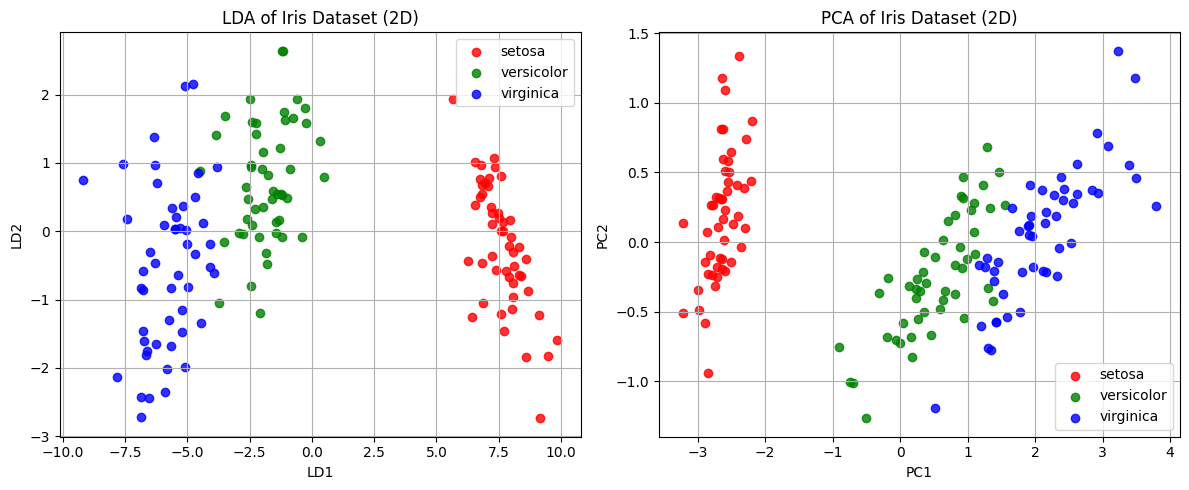

In [50]:
# Import libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data       # 4 features
y = iris.target     # Target labels
target_names = iris.target_names

# Optional: Label encoding (here y is already numeric)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 2: Apply LDA (Linear Discriminant Analysis) - reduce to 2D
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit(X, y_encoded).transform(X)

# Step 3: Apply PCA (Principal Component Analysis) - reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 4: Visualize LDA result
colors = ['red', 'green', 'blue']
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)  # LDA plot
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_lda[y_encoded == i, 0], X_lda[y_encoded == i, 1],
                color=color, alpha=0.8, label=target_name)
plt.title('LDA of Iris Dataset (2D)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.grid(True)

# Step 5: Visualize PCA result
plt.subplot(1, 2, 2)  # PCA plot
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y_encoded == i, 0], X_pca[y_encoded == i, 1],
                color=color, alpha=0.8, label=target_name)
plt.title('PCA of Iris Dataset (2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Random Forests (Ensemble)

In [51]:
# 22. Write a Python code to perform bootstrap sampling on a dataset using a Random Forest Classifier. The dataset consists of features and labels as specified below.
# Dataset Description:
# • The dataset consists of 150 samples with 10 features.
# • The target variable is categorical with three classes (0, 1, 2).
# Instructions:
# • Import the necessary libraries.
# • Load or create a synthetic dataset with the specified characteristics.
# • Implement bootstrap sampling to create multiple samples from the original dataset.
# • Train a Random Forest Classifier on each bootstrap sample.
# • Evaluate the model on the original dataset and print the accuracy for each bootstrap sample.
# • Calculate and print the average accuracy across all bootstrap samples.

In [52]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Set random seed for reproducibility
np.random.seed(42)

# Create a synthetic dataset
X, y = make_classification(
    n_samples=150,       # 150 samples
    n_features=10,       # 10 features
    n_informative=7,     # 7 informative features
    n_redundant=2,       # 2 redundant features
    n_classes=3,         # 3 target classes
    random_state=42
)

# Parameters
n_bootstrap_samples = 5   # Number of bootstrap samples
rf_estimators = 100        # Number of trees in Random Forest

# List to store accuracy scores
accuracies = []

# Perform bootstrap sampling and train Random Forest
for i in range(n_bootstrap_samples):
    # Generate bootstrap sample indices
    bootstrap_indices = np.random.choice(range(X.shape[0]), size=X.shape[0], replace=True)

    # Create bootstrap sample
    X_bootstrap = X[bootstrap_indices]
    y_bootstrap = y[bootstrap_indices]

    # Initialize Random Forest Classifier
    rf = RandomForestClassifier(n_estimators=rf_estimators, random_state=42)

    # Train on bootstrap sample
    rf.fit(X_bootstrap, y_bootstrap)

    # Evaluate on original dataset
    y_pred = rf.predict(X)
    acc = accuracy_score(y, y_pred)
    accuracies.append(acc)

    print(f"Bootstrap Sample {i+1} Accuracy: {acc:.4f}")

# Calculate and print average accuracy
avg_accuracy = np.mean(accuracies)
print(f"\nAverage Accuracy across all bootstrap samples: {avg_accuracy:.4f}")


Bootstrap Sample 1 Accuracy: 0.8533
Bootstrap Sample 2 Accuracy: 0.8933
Bootstrap Sample 3 Accuracy: 0.8533
Bootstrap Sample 4 Accuracy: 0.8933
Bootstrap Sample 5 Accuracy: 0.8733

Average Accuracy across all bootstrap samples: 0.8733


In [53]:
# 25. Write a Python code to perform Stratified K-Fold Cross-Validation on a dataset using a Random Forest Classifier. The dataset consists of features and labels as specified below.
# Dataset Description:
# • The dataset consists of 200 samples with 15 features.
# • The target variable is categorical with four classes (0, 1, 2, 3).
# Instructions:
# • Import the necessary libraries.
# • Load or create a synthetic dataset with the specified characteristics, ensuring class imbalance.
# • Implement Stratified K-Fold Cross-Validation with 5 folds.
# • Train a Random Forest Classifier on each training set and evaluate it on the validation set.
# • Calculate and print the accuracy for each fold, as well as the average accuracy across all folds.
# Generate and visualize the classification report for the final model, including precision, recall, and F1-score for each class.

In [54]:
# 1️⃣ Import necessary libraries
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# 2️⃣ Create a synthetic dataset with class imbalance
X, y = make_classification(
    n_samples=200,
    n_features=15,
    n_informative=10,
    n_redundant=3,
    n_classes=4,
    weights=[0.5, 0.2, 0.2, 0.1],  # Imbalanced classes
    random_state=42
)

# 3️⃣ Initialize Stratified K-Fold with 5 splits
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4️⃣ Prepare to store fold accuracies
fold_accuracies = []

# 5️⃣ Loop through each fold
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    # Split data into training and validation sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train Random Forest Classifier
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predict on validation set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    fold_accuracies.append(acc)
    print(f"Fold {fold} Accuracy: {acc:.2f}")

# 6️⃣ Print average accuracy across all folds
print(f"\nAverage Accuracy: {np.mean(fold_accuracies):.2f}")

# 7️⃣ Train final model on full dataset for classification report
final_model = RandomForestClassifier(n_estimators=100, random_state=42)
final_model.fit(X, y)
y_pred_full = final_model.predict(X)

# 8️⃣ Generate classification report
report = classification_report(y, y_pred_full, output_dict=True)
df_report = pd.DataFrame(report).transpose()
print("\nClassification Report:\n")
print(df_report)


Fold 1 Accuracy: 0.72
Fold 2 Accuracy: 0.72
Fold 3 Accuracy: 0.75
Fold 4 Accuracy: 0.72
Fold 5 Accuracy: 0.60

Average Accuracy: 0.71

Classification Report:

              precision  recall  f1-score  support
0                   1.0     1.0       1.0     99.0
1                   1.0     1.0       1.0     40.0
2                   1.0     1.0       1.0     40.0
3                   1.0     1.0       1.0     21.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0    200.0
weighted avg        1.0     1.0       1.0    200.0


In [55]:
# 31. Use the Breast Cancer dataset to train a random forest classifier. The model will be trained to accurately classify tumors as benign or malignant. The dataset is imbalanced, with a significant majority of benign samples. Evaluate the model's performance using accuracy, precision, recall, and F1-score. generate complete problem statement

In [56]:
# 1️⃣ Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 2️⃣ Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# 3️⃣ Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 4️⃣ Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# 5️⃣ Make predictions
y_pred = model.predict(X_test)

# 6️⃣ Evaluate performance
print("Accuracy : ", round(accuracy_score(y_test, y_pred), 2))
print("Precision: ", round(precision_score(y_test, y_pred), 2))
print("Recall   : ", round(recall_score(y_test, y_pred), 2))
print("F1-Score : ", round(f1_score(y_test, y_pred), 2))

# 7️⃣ Detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=data.target_names))


Accuracy :  0.95
Precision:  0.96
Recall   :  0.96
F1-Score :  0.96

Classification Report:

              precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        42
      benign       0.96      0.96      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

